# the first thing is to import the libraries

In [426]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

since we don't want the warnings, we'll import the warnings and filter them to ignore

In [427]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Read the files


In [428]:
application_new = pd.read_csv("application_data.csv")

In [429]:
application_old =  pd.read_csv("previous_application.csv")

# Do the data check

First, the new application data

In [430]:
application_new.shape

(307511, 122)

In [431]:
application_new.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [432]:
application_new.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [433]:
application_new.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

# Data Cleaning

after the data quality check and seeing the missing values, we'll start dealing with them.

the first step would be to find out the percentage of the missing values in each columns and removing any column where the percentage of nulls in more than 40%

In [434]:
application_new_null_percentage = application_new.isnull().sum()/len(application_new)*100

In [435]:
application_new_null_percentage.sort_values()

SK_ID_CURR                       0.000000
HOUR_APPR_PROCESS_START          0.000000
REG_REGION_NOT_WORK_REGION       0.000000
LIVE_REGION_NOT_WORK_REGION      0.000000
REG_CITY_NOT_LIVE_CITY           0.000000
REG_CITY_NOT_WORK_CITY           0.000000
LIVE_CITY_NOT_WORK_CITY          0.000000
ORGANIZATION_TYPE                0.000000
FLAG_DOCUMENT_21                 0.000000
FLAG_DOCUMENT_20                 0.000000
FLAG_DOCUMENT_19                 0.000000
FLAG_DOCUMENT_18                 0.000000
FLAG_DOCUMENT_17                 0.000000
FLAG_DOCUMENT_16                 0.000000
FLAG_DOCUMENT_15                 0.000000
FLAG_DOCUMENT_14                 0.000000
FLAG_DOCUMENT_13                 0.000000
FLAG_DOCUMENT_12                 0.000000
FLAG_DOCUMENT_11                 0.000000
FLAG_DOCUMENT_10                 0.000000
FLAG_DOCUMENT_9                  0.000000
FLAG_DOCUMENT_8                  0.000000
FLAG_DOCUMENT_7                  0.000000
FLAG_DOCUMENT_6                  0

In [436]:
application_new_null_percentage[application_new_null_percentage>=40]

OWN_CAR_AGE                     65.990810
EXT_SOURCE_1                    56.381073
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50.749729
BASEMENTAREA_MODE               58.515956
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BUILD_MODE                66.497784
COMMONAREA_MODE                 69.872297
ELEVATORS_MODE                  53.295980
ENTRANCES_MODE                  50.348768
FLOORSMAX_MODE                  49

In [437]:
application_new_null_percentage[application_new_null_percentage>=40].index

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FO

In [438]:
application_new.drop(columns=['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'], inplace=True)

to check if the columns have been dropped, we'll see the shape of the dataframe

In [439]:
application_new.shape

(307511, 73)

now, we'll deal with the columns that have a low null values percentage, i.e. 15%

In [440]:
application_new_null_percentage[application_new_null_percentage<=15]

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

in the class we were told to simply recommend imputations and not do them, so that's what I'll do. I'll write a recommended imputation in the markdown format after checking the value_counts() of each of the columns

In [441]:
application_new.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts()

0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

given the fact that 0.0 is in such a high percentage, the recommended imputation is to replace the null values with 0.0

In [442]:
application_new.AMT_REQ_CREDIT_BUREAU_DAY.value_counts()

0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

given the fact that 0.0 is in such a high percentage, the recommended imputation is to replace the null values with 0.0

In [443]:
application_new.AMT_REQ_CREDIT_BUREAU_WEEK.value_counts()

0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

given the fact that 0.0 is in such a high percentage, the recommended imputation is to replace the null values with 0.0

In [444]:
application_new.AMT_REQ_CREDIT_BUREAU_MON.value_counts()

0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
23.0         1
27.0         1
22.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

given the fact that 0.0 is in such a high percentage, the recommended imputation is to replace the null values with 0.0

In [445]:
application_new.AMT_REQ_CREDIT_BUREAU_QRT.value_counts()

0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
8.0           7
7.0           7
261.0         1
19.0          1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

given the fact that 0.0 is in such a high percentage, the recommended imputation is to replace the null values with 0.0

In [446]:
application_new.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts()

0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
25.0        1
23.0        1
22.0        1
21.0        1
20.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

in this column, since the difference between 0.0, 1.0, 2.0 is so low, that I would suggest the instead of imputing with 1 number, we should impute with a range of integers including 0,1,2 i.e.---> range(0,3)

In [447]:
application_new.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE               

In [448]:
application_new.DAYS_BIRTH.value_counts()

-13749    43
-13481    42
-18248    41
-10020    41
-15771    40
-10292    40
-14267    39
-13263    39
-11664    39
-14395    39
-13891    38
-13480    38
-15565    38
-13634    38
-15042    38
-13788    38
-14791    38
-13584    38
-10136    37
-14790    37
-10107    37
-14890    37
-10192    37
-11108    37
-16257    37
-20074    37
-14767    37
-16690    37
-15048    37
-13217    37
-12806    37
-14276    37
-15563    37
-15450    37
-14386    36
-10519    36
-11524    36
-13904    36
-14926    36
-14137    36
-13643    36
-13271    36
-13706    36
-15322    36
-14776    36
-13708    36
-15009    35
-11135    35
-12776    35
-11266    35
-14120    35
-16830    35
-14099    35
-15901    35
-16185    35
-12682    35
-15073    35
-14384    35
-11588    35
-10978    35
-10088    35
-11097    35
-14825    35
-13254    35
-13687    35
-17873    35
-13922    35
-10223    35
-12433    35
-15164    35
-10123    35
-15155    35
-10213    35
-15044    35
-14350    35
-9981     35
-14297    35

In [449]:
application_new['AGE'] = application_new.DAYS_BIRTH

In [450]:
application_new['AGE'] = application_new.AGE.apply(lambda x: abs(x)/365)

In [451]:
application_new.drop(columns='DAYS_BIRTH', inplace=True)

In [452]:
application_new['AGE'].value_counts()

37.668493    43
36.934247    42
49.994521    41
27.452055    41
43.208219    40
28.197260    40
39.087671    39
36.336986    39
31.956164    39
39.438356    39
38.057534    38
36.931507    38
42.643836    38
37.353425    38
41.210959    38
37.775342    38
40.523288    38
37.216438    38
27.769863    37
40.520548    37
27.690411    37
40.794521    37
27.923288    37
30.432877    37
44.539726    37
54.997260    37
40.457534    37
45.726027    37
41.227397    37
36.210959    37
35.084932    37
39.112329    37
42.638356    37
42.328767    37
39.413699    36
28.819178    36
31.572603    36
38.093151    36
40.893151    36
38.731507    36
37.378082    36
36.358904    36
37.550685    36
41.978082    36
40.482192    36
37.556164    36
41.120548    35
30.506849    35
35.002740    35
30.865753    35
38.684932    35
46.109589    35
38.627397    35
43.564384    35
44.342466    35
34.745205    35
41.295890    35
39.408219    35
31.747945    35
30.076712    35
27.638356    35
30.402740    35
40.61643

In [453]:
application_new.DAYS_REGISTRATION.value_counts()

-1.000000        113
-7.000000         98
-6.000000         96
-4.000000         92
-2.000000         92
-5.000000         86
-3.000000         84
-9.000000         84
-14.000000        80
-21.000000        80
 0.000000         80
-10.000000        79
-11.000000        67
-511.000000       66
-15.000000        66
-8.000000         65
-56.000000        65
-23.000000        64
-41.000000        63
-621.000000       63
-13.000000        62
-70.000000        62
-34.000000        62
-69.000000        62
-19.000000        62
-20.000000        62
-742.000000       61
-812.000000       61
-29.000000        61
-735.000000       61
-679.000000       61
-389.000000       60
-569.000000       60
-827.000000       60
-342.000000       60
-42.000000        60
-4606.000000      60
-889.000000       59
-542.000000       59
-923.000000       59
-393.000000       59
-47.000000        59
-630.000000       59
-251.000000       59
-490.000000       58
-434.000000       58
-973.000000       58
-371.000000  

In [454]:
application_new.DAYS_REGISTRATION = application_new.DAYS_REGISTRATION.apply(lambda x: abs(x))

In [455]:
application_new.DAYS_REGISTRATION.value_counts()

1.000000        113
7.000000         98
6.000000         96
4.000000         92
2.000000         92
5.000000         86
3.000000         84
9.000000         84
14.000000        80
21.000000        80
0.000000         80
10.000000        79
11.000000        67
511.000000       66
15.000000        66
8.000000         65
56.000000        65
23.000000        64
41.000000        63
621.000000       63
13.000000        62
70.000000        62
34.000000        62
69.000000        62
19.000000        62
20.000000        62
742.000000       61
812.000000       61
29.000000        61
735.000000       61
679.000000       61
389.000000       60
569.000000       60
827.000000       60
342.000000       60
42.000000        60
4606.000000      60
889.000000       59
542.000000       59
923.000000       59
393.000000       59
47.000000        59
630.000000       59
251.000000       59
490.000000       58
434.000000       58
973.000000       58
371.000000       58
736.000000       58
614.000000       58


In [456]:
application_new.DAYS_EMPLOYED.value_counts()

 365243    55374
-200         156
-224         152
-230         151
-199         151
-212         150
-384         143
-229         143
-231         140
-215         138
-207         138
-216         137
-188         137
-196         136
-116         136
-222         135
-193         134
-195         133
-214         132
-254         131
-213         131
-201         130
-381         130
-233         128
-185         128
-194         127
-237         127
-184         126
-234         126
-209         125
-348         125
-241         124
-745         123
-137         123
-382         122
-139         122
-198         122
-238         122
-218         120
-240         120
-205         120
-191         120
-118         119
-223         119
-225         119
-181         118
-430         118
-244         118
-227         118
-268         117
-370         117
-133         117
-132         117
-228         117
-115         117
-119         116
-204         116
-129         116
-109         1

In [457]:
application_new.DAYS_EMPLOYED = application_new.DAYS_EMPLOYED.apply(lambda x: abs(x))

In [458]:
application_new.DAYS_EMPLOYED.value_counts()

365243    55374
200         156
224         152
230         151
199         151
212         150
384         143
229         143
231         140
215         138
207         138
216         137
188         137
196         136
116         136
222         135
193         134
195         133
214         132
254         131
213         131
201         130
381         130
233         128
185         128
194         127
237         127
184         126
234         126
209         125
348         125
241         124
745         123
137         123
382         122
139         122
198         122
238         122
218         120
240         120
205         120
191         120
118         119
223         119
225         119
181         118
430         118
244         118
227         118
268         117
370         117
133         117
132         117
228         117
115         117
119         116
204         116
129         116
109         115
391         115
236         115
206         115
208     

In [459]:
application_new.DAYS_ID_PUBLISH.value_counts()

-4053    169
-4095    162
-4046    161
-4417    159
-4256    158
-4032    157
-4151    157
-4200    156
-4171    155
-4214    155
-4270    154
-4285    154
-4096    154
-4047    154
-4263    153
-4375    152
-4291    151
-4220    150
-4074    150
-4144    150
-4166    149
-4389    148
-4320    148
-4319    148
-4130    148
-4312    147
-4081    147
-4221    147
-4264    146
-4073    146
-4109    146
-4215    146
-4039    146
-4536    145
-4061    144
-4017    144
-4123    143
-4100    143
-4025    143
-4186    143
-4193    142
-4298    142
-4445    141
-4262    141
-4145    141
-4452    141
-4382    141
-4305    141
-4103    141
-4376    140
-4236    140
-4390    140
-4586    140
-4250    140
-4396    140
-4368    139
-4410    139
-4143    139
-4571    139
-4137    139
-4438    138
-4067    138
-4129    138
-4354    138
-4172    138
-4370    138
-4333    138
-4066    138
-4158    138
-4271    137
-4087    137
-4126    137
-4080    137
-4194    137
-4325    136
-4054    136
-4102    136

In [460]:
application_new.DAYS_ID_PUBLISH = application_new.DAYS_ID_PUBLISH.apply(lambda x: abs(x))

In [461]:
application_new.DAYS_ID_PUBLISH.value_counts()

4053    169
4095    162
4046    161
4417    159
4256    158
4032    157
4151    157
4200    156
4171    155
4214    155
4270    154
4285    154
4096    154
4047    154
4263    153
4375    152
4291    151
4220    150
4074    150
4144    150
4166    149
4389    148
4320    148
4319    148
4130    148
4312    147
4081    147
4221    147
4264    146
4073    146
4109    146
4215    146
4039    146
4536    145
4061    144
4017    144
4123    143
4100    143
4025    143
4186    143
4193    142
4298    142
4445    141
4262    141
4145    141
4452    141
4382    141
4305    141
4103    141
4376    140
4236    140
4390    140
4586    140
4250    140
4396    140
4368    139
4410    139
4143    139
4571    139
4137    139
4438    138
4067    138
4129    138
4354    138
4172    138
4370    138
4333    138
4066    138
4158    138
4271    137
4087    137
4126    137
4080    137
4194    137
4325    136
4054    136
4102    136
4150    136
4283    136
4369    135
4383    135
4404    135
4591    135
4284

having changed the days from negative to positibe to make the analysis easier, we'll proceed to check for outliers in the data

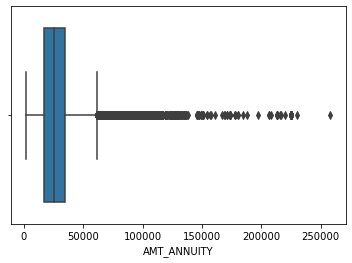

In [462]:
sns.boxplot(application_new.AMT_ANNUITY)
plt.show()

In [463]:
application_new.AMT_ANNUITY.median()

24903.0

in application_new.AMT_ANNUITY, the high number of outliers is an indicator of some annuity amounts high than other. Annuity is a service banks provide where you pay bank a large amount of money over time and the bank gives it back to you after some time with interest. in most cases, Annuity is used as a retirement fund by people so it depends on the amount you paid. people with different salaries/incomes pay different ammounts hence have different annuities. 

if you want to analize the annuity column, the best way would be the median value instead of the mean

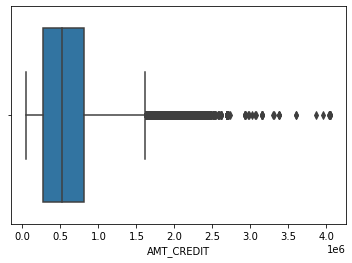

In [464]:
sns.boxplot(application_new.AMT_CREDIT)
plt.show()

in application_new.AMT_CREDIT, the AMT_CREDIT is the final credit amount in the previous application. this differs in various cases because everone buys different items with different cost and if someone buys a costly item their credit amount will be higher than other

in this case as well, I would suggest to use the median amount instead of the mean amount to be used in analysis

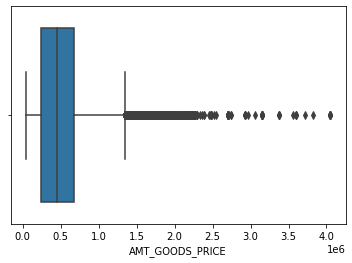

In [465]:
sns.boxplot(application_new.AMT_GOODS_PRICE)
plt.show()

in application_new.AMT_GOODS_PRICE, the column contains the cost of the goods that the client asked for. different people buy different things according to their needs and income so it makes sense that the outliers will be present in the data

in this case as well, I would suggest to use the median amount instead of the mean amount to be used in analysis

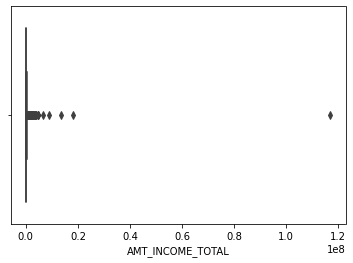

In [466]:
sns.boxplot(application_new.AMT_INCOME_TOTAL)
plt.show()

in the application_new.AMT_INCOME_TOTAL data, there are so many outliers that the box is not even visible. Since this column contains the incomes of the people, it makes sense that there are so many outliers. the incomes depends on various things like job, experience, age etc and since the data contains so many professions, the outliers would be obvious

in this case as well, I would suggest to use the median amount instead of the mean amount to be used in analysis

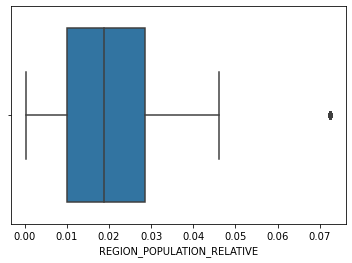

In [467]:
sns.boxplot(application_new.REGION_POPULATION_RELATIVE)
plt.show()

in the application_new.REGION_POPULATION_RELATIVE, the column contains the relative population of the region. the population depends on the property rates, amentities like school and markets so there can be varience. but as seen in the boxplot, there's only 1 outlier

since there's only 1 outlier, it's possible to remove that and use mean. or the other alternative would be to simply use median here as well

there are some columns wiht continuous values so we'll bin them together to make the analysis easier and more legible

we'll create AMT_INCOME_RANGE from AMT_INCOME_TOTAL which will have bins with range of income

In [468]:
bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,525000,9999999]
labels = ['0-25000', '25000-50000','50000-75000','75000-100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000-525000', '525000 and above']

application_new['AMT_INCOME_RANGE']=pd.cut(application_new['AMT_INCOME_TOTAL'],bins=bins,labels=labels)

we'll create CREDIT_RANGE from CREDIT_AMT which will have bins with range of credit amounts

In [469]:
bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

application_new['AMT_CREDIT_RANGE']=pd.cut(application_new['AMT_CREDIT'],bins=bins,labels=slots)

We'll create AGE_GROUP from AGE which will have range of ages

In [470]:
bins = [18,25,35,45,55,65,100]
ages = ['18-25','25-35','35-45','45-55','55-65','65 and above']

application_new['AGE_GROUP'] = pd.cut(application_new['AGE'],bins = bins,labels=ages)

# Checking the Imbalance Percentage

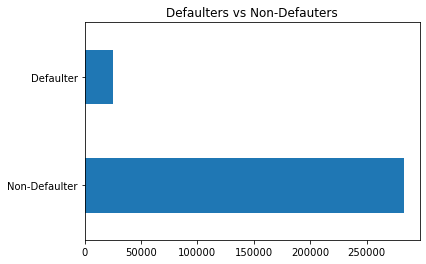

In [471]:
application_new.TARGET.value_counts().plot.barh()
plt.title("Defaulters vs Non-Defauters")
plt.yticks((1,0),['Defaulter', 'Non-Defaulter'])
plt.show()

as seen from the bar-graph, the number of defaulters as compared to non-defaulters in only around 10 percent. but, each defaulter costs banks a lot of money that's why this analysis is very necessary. 

for further analysis, we'll split the graph around the column "TARGET", but since there are a lot of columns and we don't need most, we'll create a separate dataset with the ones we need

In [472]:
application_new_final = application_new[['SK_ID_CURR', 'TARGET', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'OCCUPATION_TYPE', 'REGION_RATING_CLIENT_W_CITY',
       'ORGANIZATION_TYPE', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'REGION_RATING_CLIENT', 'AMT_GOODS_PRICE', 'AGE_GROUP', 'AMT_INCOME_RANGE',
       'AMT_CREDIT_RANGE']]

In [473]:
application_new_final.head()

SK_ID_CURR  TARGET CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100002       1           M            N               Y   
1      100003       0           F            N               N   
2      100004       0           M            Y               Y   
3      100006       0           F            N               Y   
4      100007       0           M            N               Y   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   
3          Working  Secondary / secondary special        Civil marriage   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE  DAYS_EMPLOYED  ...  OCCUPATION_TYPE  \
0  House / apartment            637  ...         Laborers   
1  House / apartment           1188  ...       Core staff   
2  House / apartment            225  ...         Laborers   
3  House / apartment           3039  ...         Laborers   
4  House / apartment           3038  ...       Core staff   

  REGION_RATING_CLIENT_W_CITY       ORGANIZATION_TYPE NAME_CONTRACT_TYPE  \
0                           2  Business Entity Type 3         Cash loans   
1                           1                  School         Cash loans   
2                           2              Government    Revolving loans   
3                           2  Business Entity Type 3         Cash loans   
4                           2                Religion         Cash loans   

  AMT_ANNUITY  REGION_RATING_CLIENT  AMT_GOODS_PRICE  AGE_GROUP  \
0     24700.5                     2         351000.0      25-35   
1     35698.5                     1        1129500.0      45-55   
2      6750.0                     2         135000.0      45-55   
3     29686.5                     2         297000.0      45-55   
4     21865.5                     2         513000.0      45-55   

  AMT_INCOME_RANGE  AMT_CREDIT_RANGE  
0    200000-225000     400000-450000  
1    250000-275000  900000 and above  
2      50000-75000          0-150000  
3    125000-150000     300000-350000  
4    100000-125000     500000-550000  

[5 rows x 21 columns]

In [474]:
application_new_final_target_default = application_new_final.loc[application_new_final['TARGET'] == 1]

In [475]:
application_new_final_target_non_default = application_new_final.loc[application_new_final['TARGET'] == 0]

to check if the data is split properly, we'll check the shape of the data and then proceed with the analysis

In [476]:
application_new_final_target_default.shape

(24825, 21)

In [477]:
application_new_final_target_non_default.shape

(282686, 21)

# Analysis

## Categorical Columns

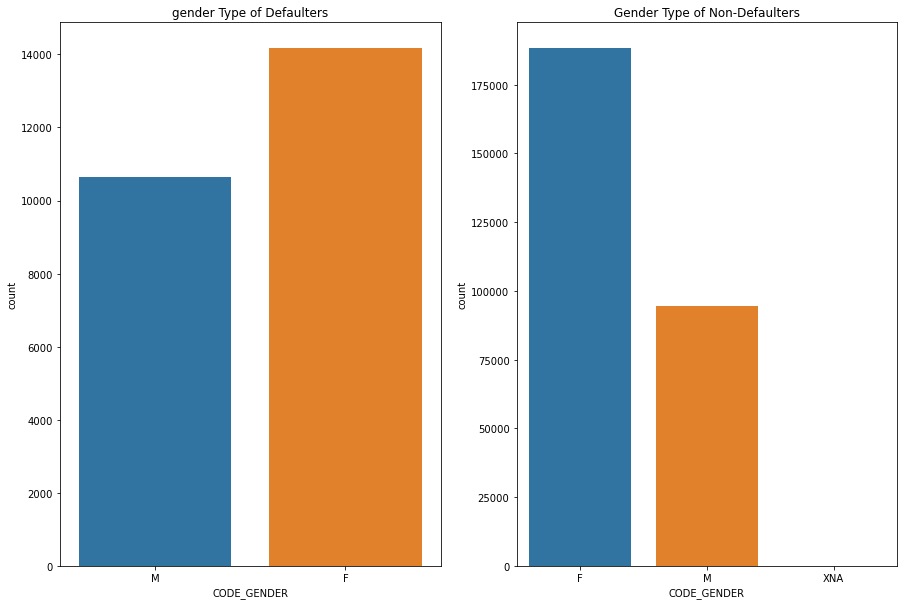

In [478]:
plt.figure(figsize = (15,10))

plt.subplot(1,2,1)
sns.countplot(x = 'CODE_GENDER', data = application_new_final_target_default)
plt.title('gender Type of Defaulters')

plt.subplot(1,2,2)
sns.countplot(x = 'CODE_GENDER', data = application_new_final_target_non_default)
plt.title('Gender Type of Non-Defaulters')
plt.show()

The above made graph shows that the females are higher defaulters as well as non-defaulters. That can be because there's a higher number of females as compared to males. But there's a clear difference in the number of males in defaulters and non defaulters. The males are more likely to default than females. 

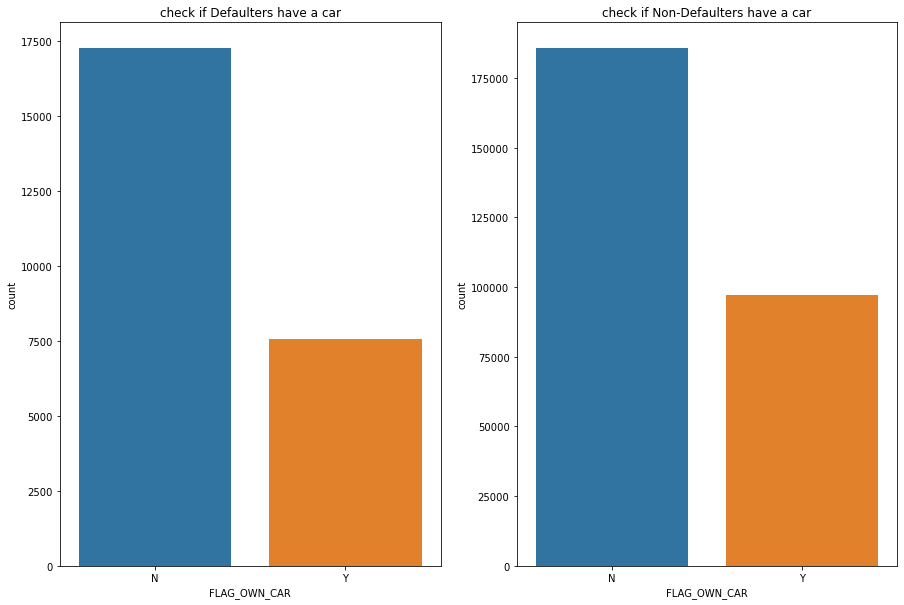

In [479]:
plt.figure(figsize = (15,10))

plt.subplot(1,2,1)
sns.countplot(x = 'FLAG_OWN_CAR', data = application_new_final_target_default)
plt.title('check if Defaulters have a car')

plt.subplot(1,2,2)
sns.countplot(x = 'FLAG_OWN_CAR', data = application_new_final_target_non_default)
plt.title('check if Non-Defaulters have a car')
plt.show()

the above graph shows that the number of clients having the car and not having the car is almost same in both the dataframes, though the number of clients having a car is higher in non-defaulters. Of course at such an early stage it's impossible  to tell if that's a co-incidence or a fact that can be considered

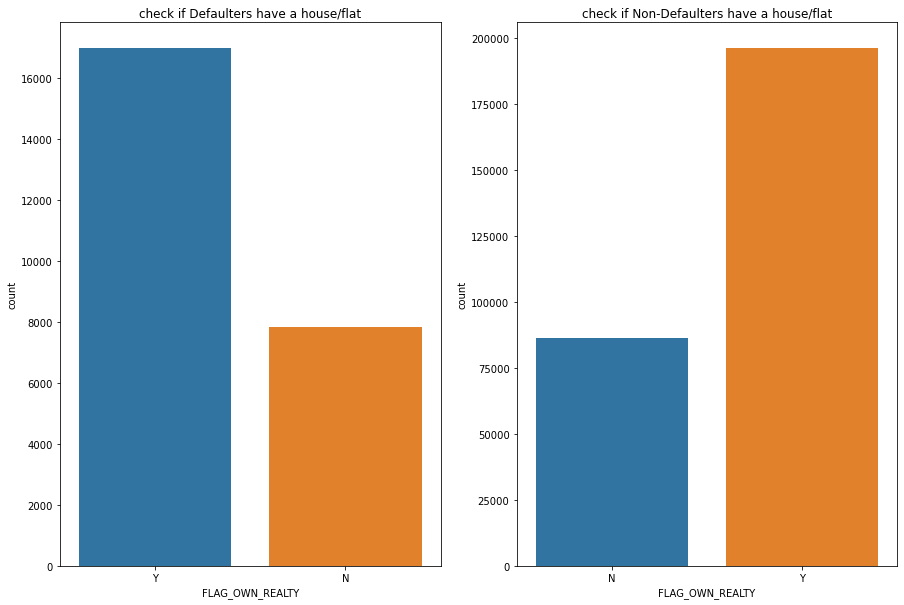

In [480]:
plt.figure(figsize = (15,10))

plt.subplot(1,2,1)
sns.countplot(x = 'FLAG_OWN_REALTY', data = application_new_final_target_default)
plt.title('check if Defaulters have a house/flat')

plt.subplot(1,2,2)
sns.countplot(x = 'FLAG_OWN_REALTY', data = application_new_final_target_non_default)
plt.title('check if Non-Defaulters have a house/flat')
plt.show()

the above graph shows that the number of clients having a house/flat and not having a house/flat is almost same in both the dataframes, though the number of clients not having a flat is slightly higher in defaulters. Of course at such an early stage it's impossible to tell if that's a co-incidence or a fact that can be considered

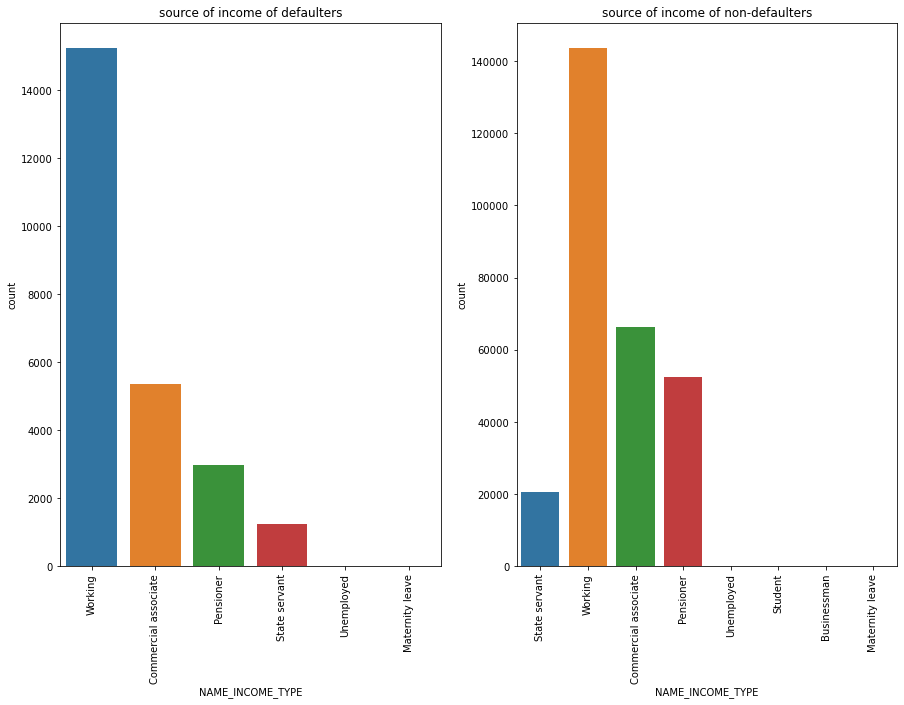

In [481]:
plt.figure(figsize = (15,10))

plt.subplot(1,2,1)
sns.countplot(x = 'NAME_INCOME_TYPE', data = application_new_final_target_default)
plt.xticks(rotation = 90)
plt.title('source of income of defaulters')

plt.subplot(1,2,2)
sns.countplot(x = 'NAME_INCOME_TYPE', data = application_new_final_target_non_default)
plt.title('source of income of non-defaulters')
plt.xticks(rotation = 90)

plt.show()

the difference in various categories in this graph is quite clear. It is fairly clear that the working people just as likely to default as they are to pay back the loan. Compared to them, Pensioners, Commercial Associates and State senvants are a lot less likely ro default the loan. Also important to note is that there's not a single instant of Businessman or student of defaulting a loan in the sample. So, the bank would be better of to lend money to students, businessmen, pensioners, and commercial associates since the possess the least risk of defaulting

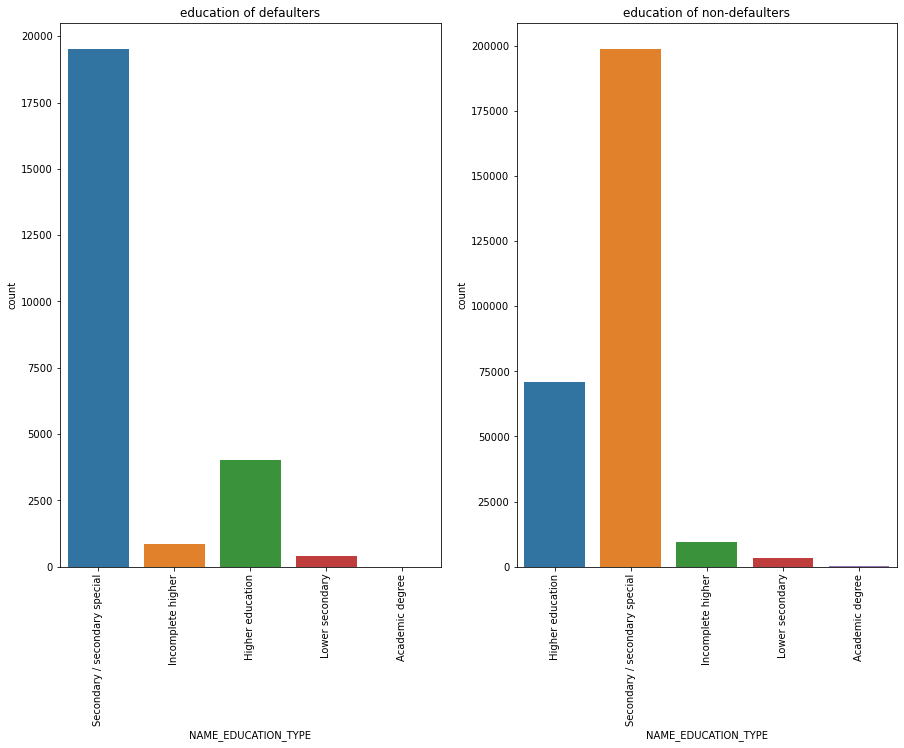

In [482]:
plt.figure(figsize = (15,10))

plt.subplot(1,2,1)
sns.countplot(x = 'NAME_EDUCATION_TYPE', data = application_new_final_target_default)
plt.xticks(rotation = 90)
plt.title('education of defaulters')

plt.subplot(1,2,2)
sns.countplot(x = 'NAME_EDUCATION_TYPE', data = application_new_final_target_non_default)
plt.title('education of non-defaulters')
plt.xticks(rotation = 90)

plt.show()

The graph shows that the people with higher education are less likely to default than those who don't have higher education. The people whith Secondary/Secondary Special are just as likely to default as they are to pay back the loan. The graph of those with lower education is slightly higher in the defaulter table than the non-defaulter table but the difference is so less that it cannot be conclusive

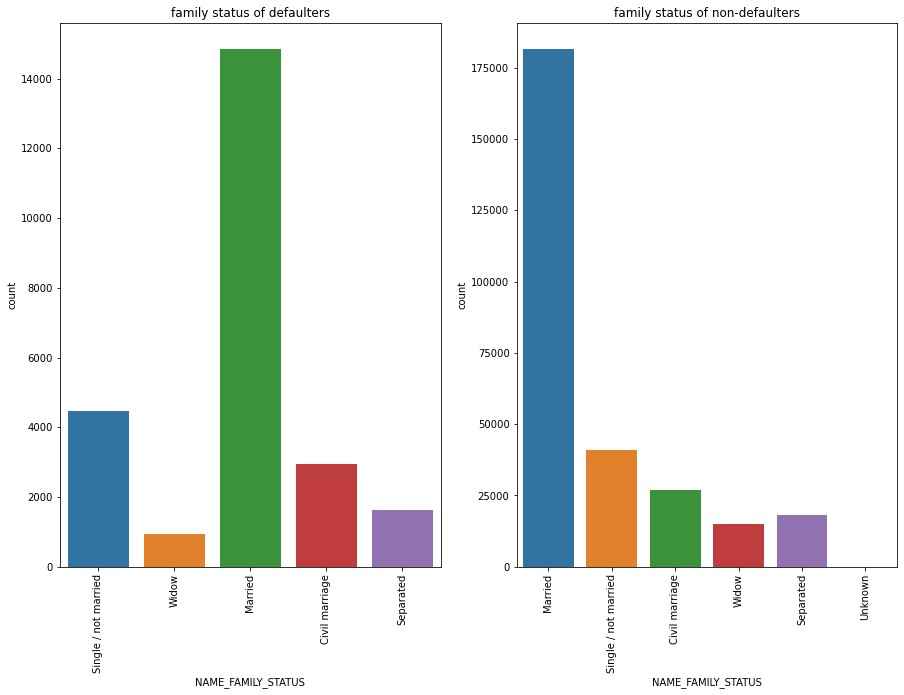

In [483]:
plt.figure(figsize = (15,10))

plt.subplot(1,2,1)
sns.countplot(x = 'NAME_FAMILY_STATUS', data = application_new_final_target_default)
plt.xticks(rotation = 90)
plt.title('family status of defaulters')

plt.subplot(1,2,2)
sns.countplot(x = 'NAME_FAMILY_STATUS', data = application_new_final_target_non_default)
plt.title('family status of non-defaulters')
plt.xticks(rotation = 90)

plt.show()

The graph shows that the single/not married people and those in a civil marriage higher in the graph of defaulters while widows are higher in the non-defaulters graph

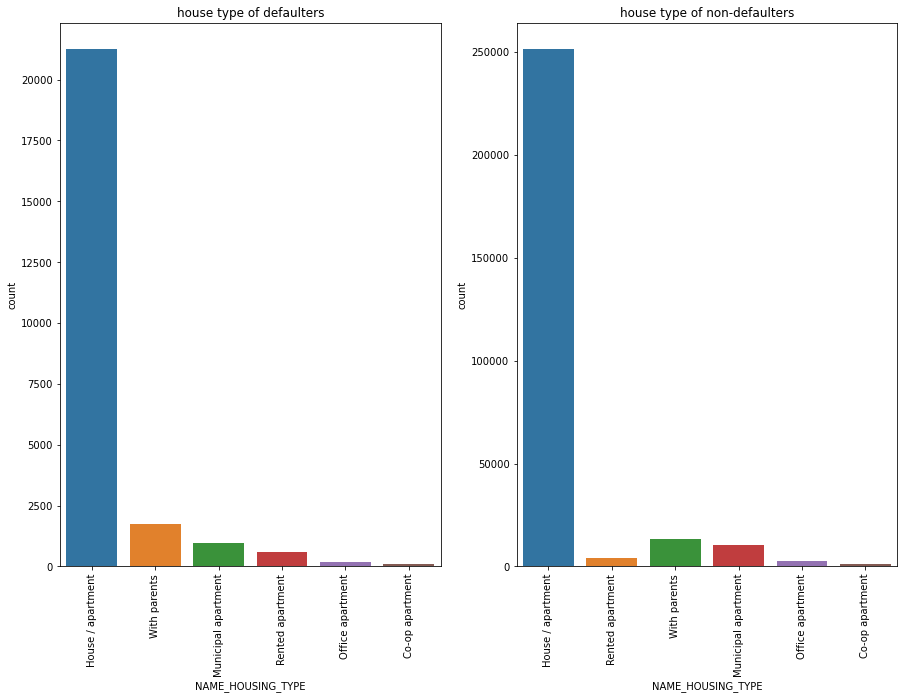

In [484]:
plt.figure(figsize = (15,10))

plt.subplot(1,2,1)
sns.countplot(x = 'NAME_HOUSING_TYPE', data = application_new_final_target_default)
plt.xticks(rotation = 90)
plt.title('house type of defaulters')

plt.subplot(1,2,2)
sns.countplot(x = 'NAME_HOUSING_TYPE', data = application_new_final_target_non_default)
plt.title('house type of non-defaulters')
plt.xticks(rotation = 90)

plt.show()

The graph shows that those who live with parents or in rented apartments are more likely to default.

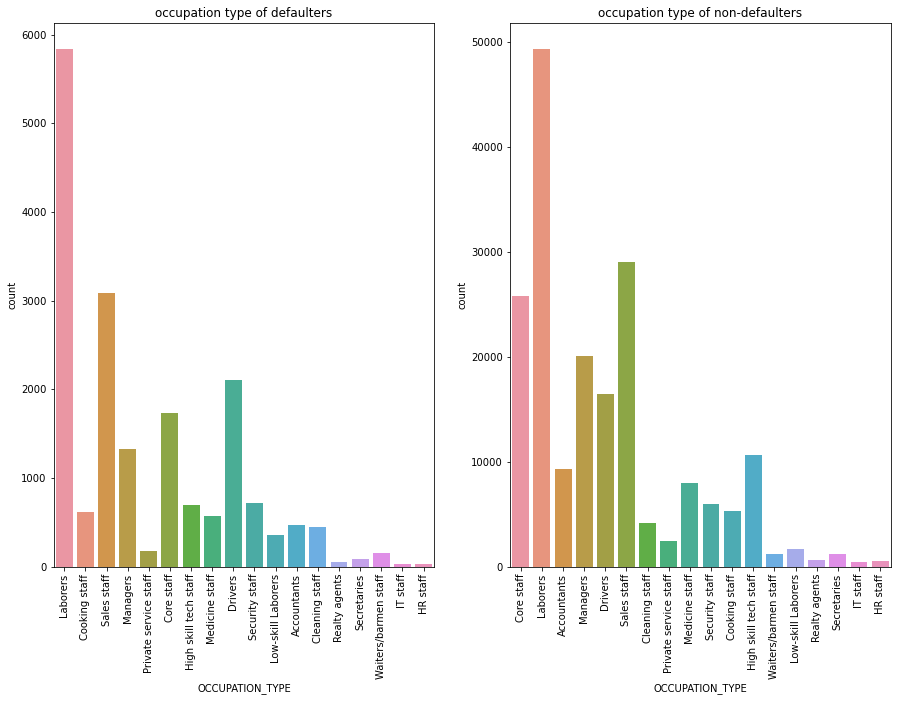

In [485]:
plt.figure(figsize = (15,10))

plt.subplot(1,2,1)
sns.countplot(x = 'OCCUPATION_TYPE', data = application_new_final_target_default)
plt.xticks(rotation = 90)
plt.title('occupation type of defaulters')

plt.subplot(1,2,2)
sns.countplot(x = 'OCCUPATION_TYPE', data = application_new_final_target_non_default)
plt.title('occupation type of non-defaulters')
plt.xticks(rotation = 90)

plt.show()

Sales staff, servic staff, managers and core staff are more likely to pay back the loans than other types.

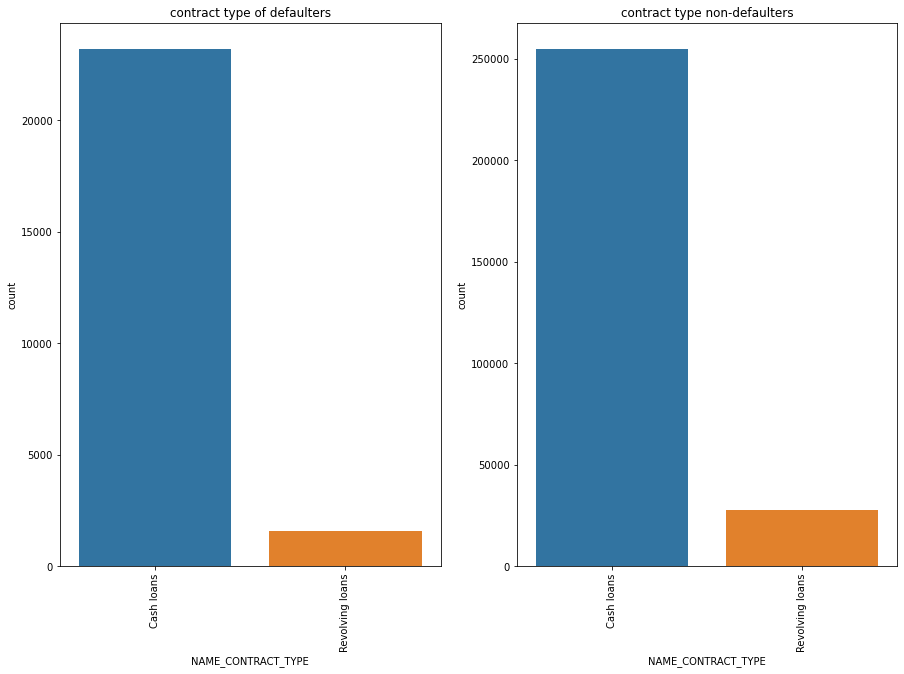

In [486]:
plt.figure(figsize = (15,10))

plt.subplot(1,2,1)
sns.countplot(x = 'NAME_CONTRACT_TYPE', data = application_new_final_target_default)
plt.xticks(rotation = 90)
plt.title('contract type of defaulters')

plt.subplot(1,2,2)
sns.countplot(x = 'NAME_CONTRACT_TYPE', data = application_new_final_target_non_default)
plt.title('contract type non-defaulters')
plt.xticks(rotation = 90)

plt.show()

The graph shows that the people with revolving loans are more likely to pay them back

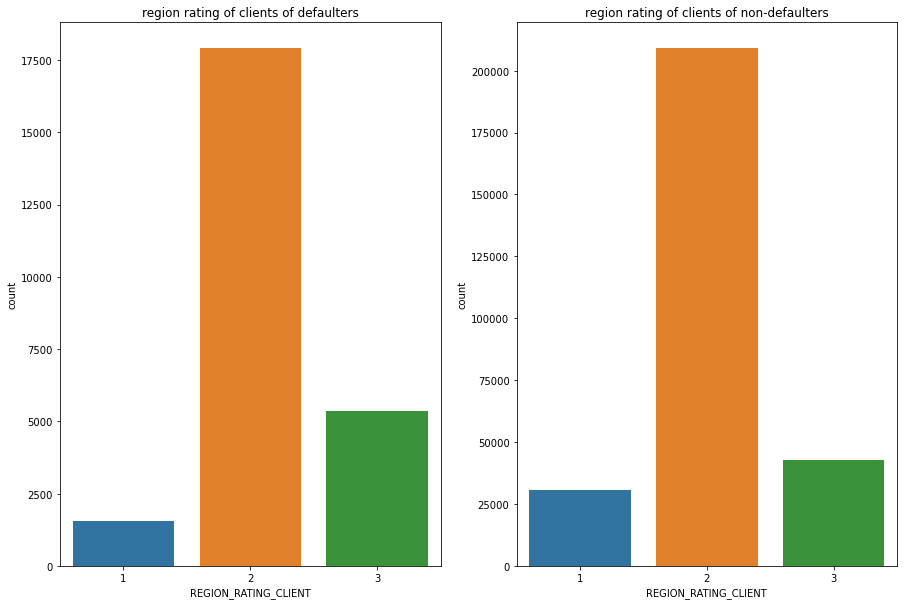

In [487]:
plt.figure(figsize = (15,10))

plt.subplot(1,2,1)
sns.countplot(data=application_new_final_target_default,x="REGION_RATING_CLIENT")
plt.title('region rating of clients of defaulters')

plt.subplot(1,2,2)
sns.countplot(data=application_new_final_target_non_default,x="REGION_RATING_CLIENT")
plt.title('region rating of clients of non-defaulters')

plt.show()

people with the region rating of 1 are higher in non-defaulters and people with region rating of 3 are higher in defaulters 

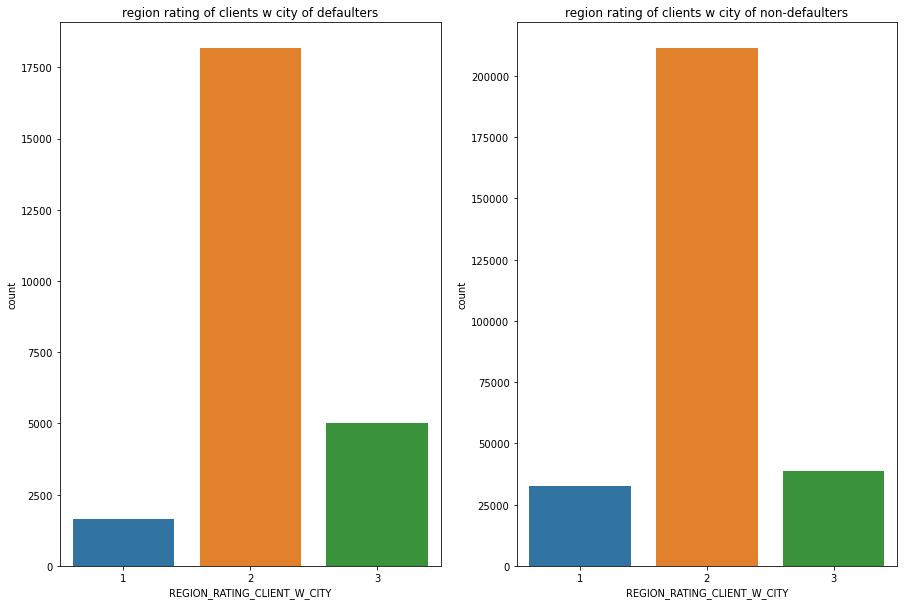

In [488]:
plt.figure(figsize = (15,10))

plt.subplot(1,2,1)
sns.countplot(data=application_new_final_target_default,x="REGION_RATING_CLIENT_W_CITY")
plt.title('region rating of clients w city of defaulters')

plt.subplot(1,2,2)
sns.countplot(data=application_new_final_target_non_default,x="REGION_RATING_CLIENT_W_CITY")
plt.title('region rating of clients w city of non-defaulters')

plt.show()

people with the region rating with city of 1 are higher in non-defaulters and people with region rating with city of 3 are higher in defaulters

## Categorical Columns devided by Gender

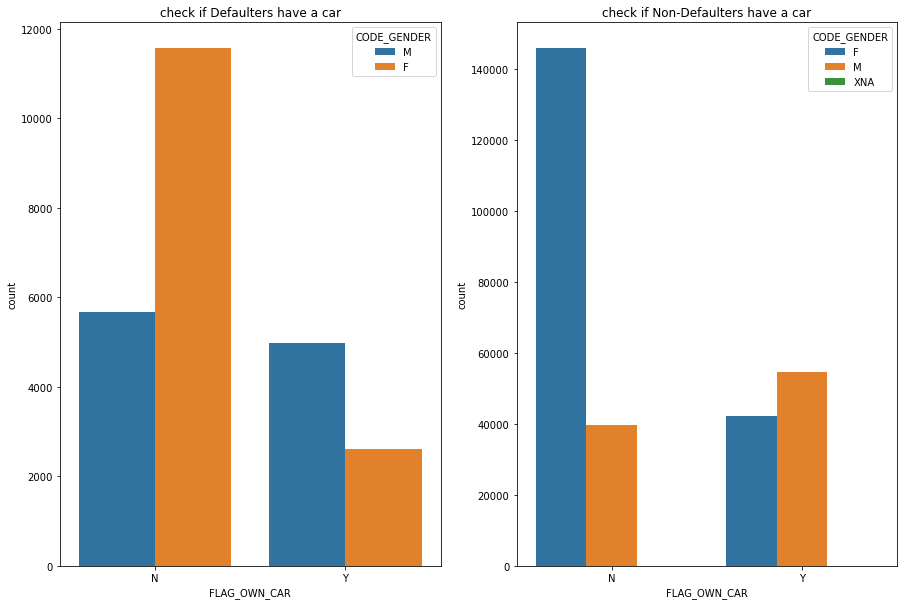

In [489]:
plt.figure(figsize = (15,10))

plt.subplot(1,2,1)
sns.countplot(x = 'FLAG_OWN_CAR', data = application_new_final_target_default,hue="CODE_GENDER")
plt.title('check if Defaulters have a car')

plt.subplot(1,2,2)
sns.countplot(x = 'FLAG_OWN_CAR', data = application_new_final_target_non_default,hue="CODE_GENDER")
plt.title('check if Non-Defaulters have a car')
plt.show()

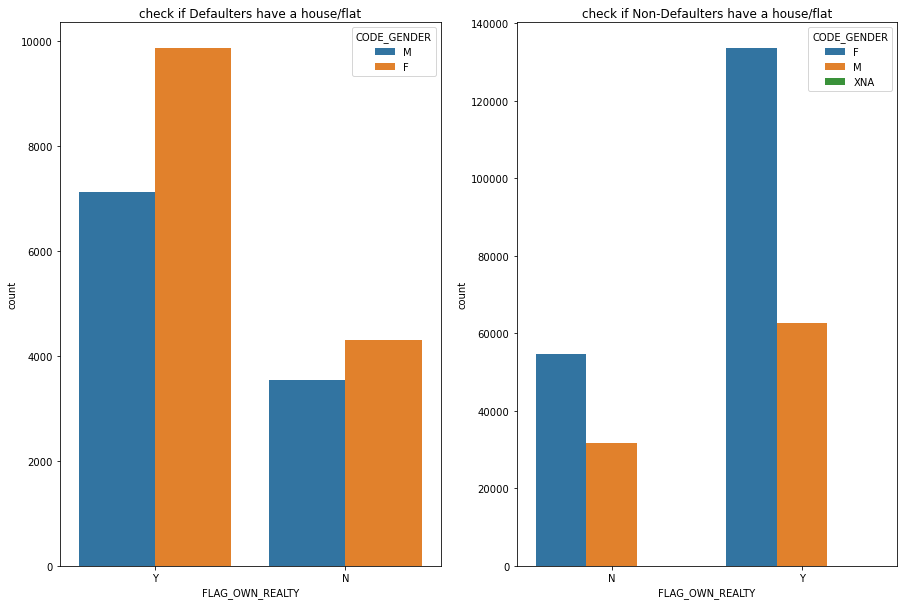

In [490]:
plt.figure(figsize = (15,10))

plt.subplot(1,2,1)
sns.countplot(x = 'FLAG_OWN_REALTY', data = application_new_final_target_default,hue="CODE_GENDER")
plt.title('check if Defaulters have a house/flat')

plt.subplot(1,2,2)
sns.countplot(x = 'FLAG_OWN_REALTY', data = application_new_final_target_non_default,hue="CODE_GENDER")
plt.title('check if Non-Defaulters have a house/flat')
plt.show()

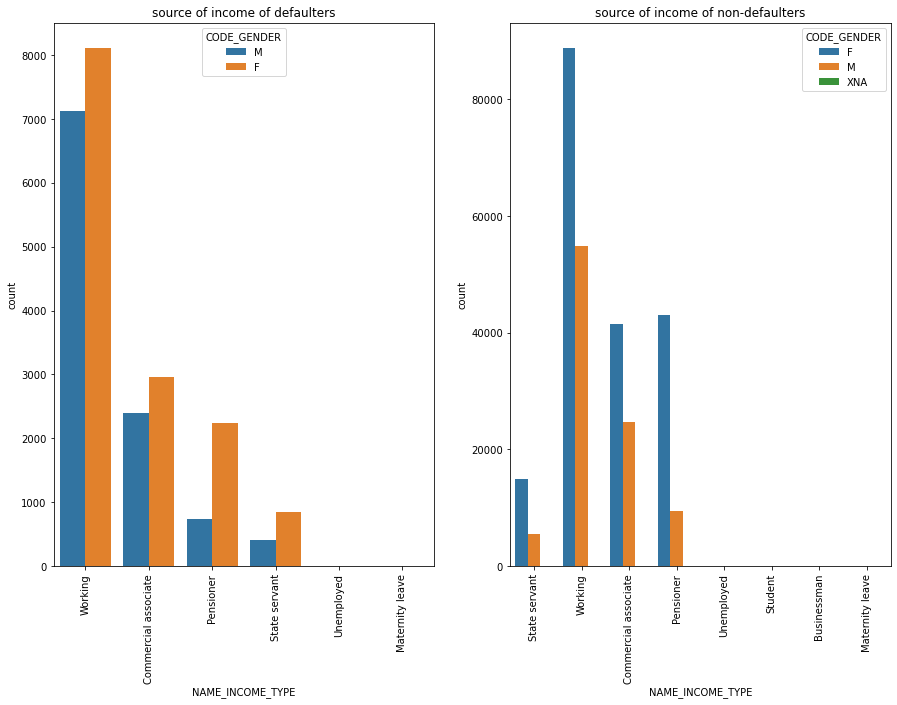

In [491]:
plt.figure(figsize = (15,10))

plt.subplot(1,2,1)
sns.countplot(x = 'NAME_INCOME_TYPE', data = application_new_final_target_default,hue="CODE_GENDER")
plt.xticks(rotation = 90)
plt.title('source of income of defaulters')

plt.subplot(1,2,2)
sns.countplot(x = 'NAME_INCOME_TYPE', data = application_new_final_target_non_default,hue="CODE_GENDER")
plt.title('source of income of non-defaulters')
plt.xticks(rotation = 90)

plt.show()

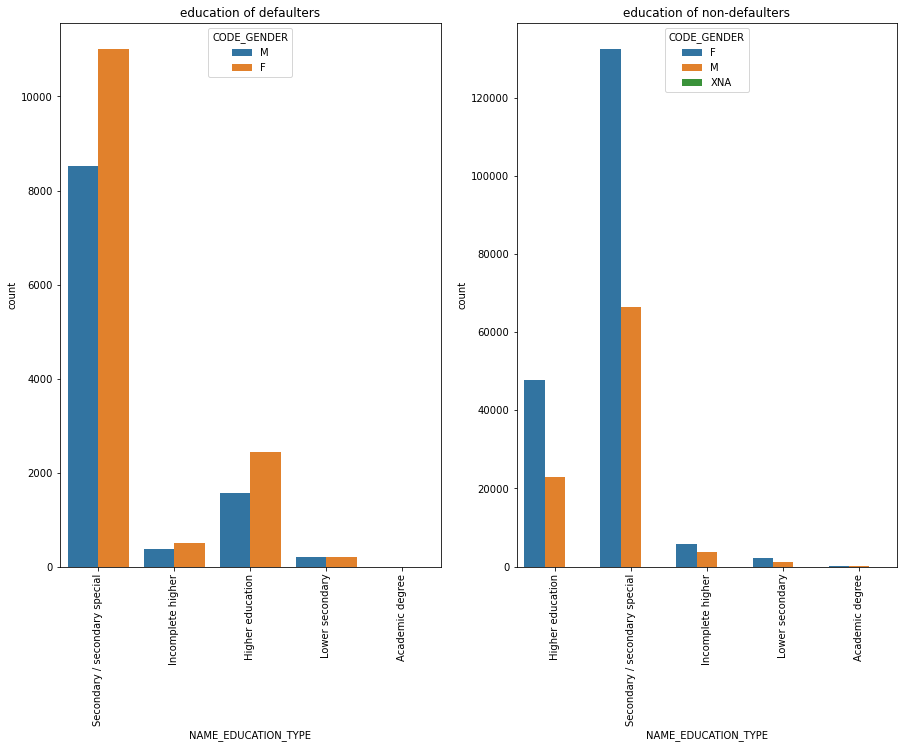

In [492]:
plt.figure(figsize = (15,10))

plt.subplot(1,2,1)
sns.countplot(x = 'NAME_EDUCATION_TYPE', data = application_new_final_target_default,hue="CODE_GENDER")
plt.xticks(rotation = 90)
plt.title('education of defaulters')

plt.subplot(1,2,2)
sns.countplot(x = 'NAME_EDUCATION_TYPE', data = application_new_final_target_non_default,hue="CODE_GENDER")
plt.title('education of non-defaulters')
plt.xticks(rotation = 90)

plt.show()

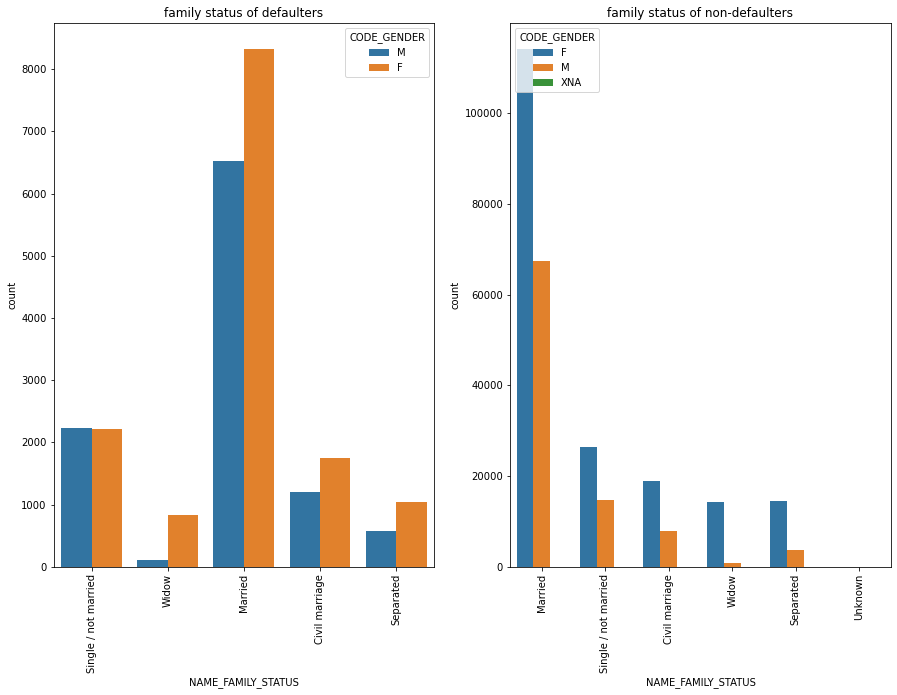

In [493]:
plt.figure(figsize = (15,10))

plt.subplot(1,2,1)
sns.countplot(x = 'NAME_FAMILY_STATUS', data = application_new_final_target_default,hue="CODE_GENDER")
plt.xticks(rotation = 90)
plt.title('family status of defaulters')

plt.subplot(1,2,2)
sns.countplot(x = 'NAME_FAMILY_STATUS', data = application_new_final_target_non_default,hue="CODE_GENDER")
plt.title('family status of non-defaulters')
plt.xticks(rotation = 90)

plt.show()

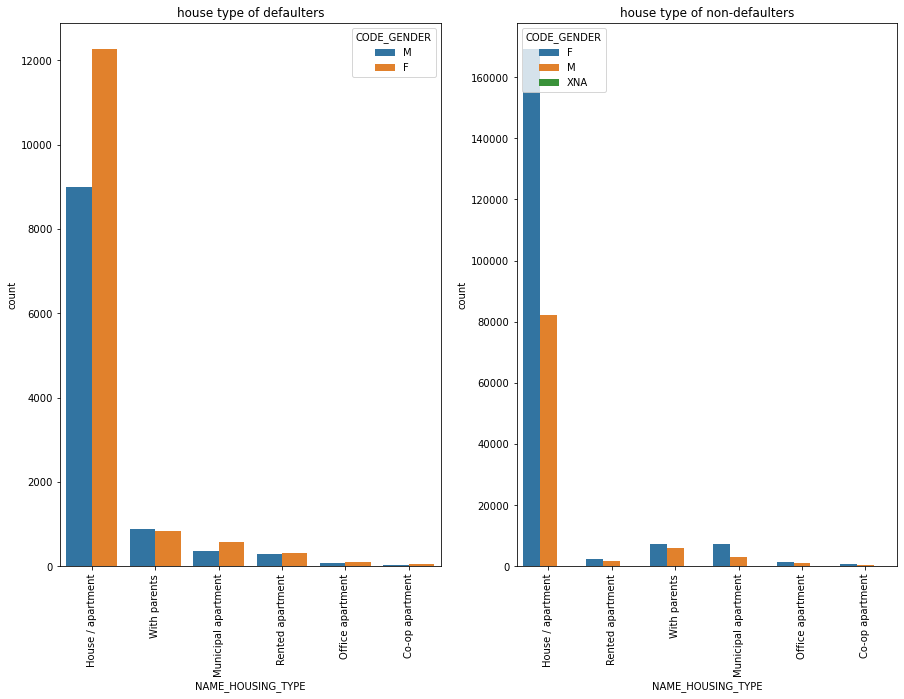

In [494]:
plt.figure(figsize = (15,10))

plt.subplot(1,2,1)
sns.countplot(x = 'NAME_HOUSING_TYPE', data = application_new_final_target_default,hue="CODE_GENDER")
plt.xticks(rotation = 90)
plt.title('house type of defaulters')

plt.subplot(1,2,2)
sns.countplot(x = 'NAME_HOUSING_TYPE', data = application_new_final_target_non_default,hue="CODE_GENDER")
plt.title('house type of non-defaulters')
plt.xticks(rotation = 90)

plt.show()

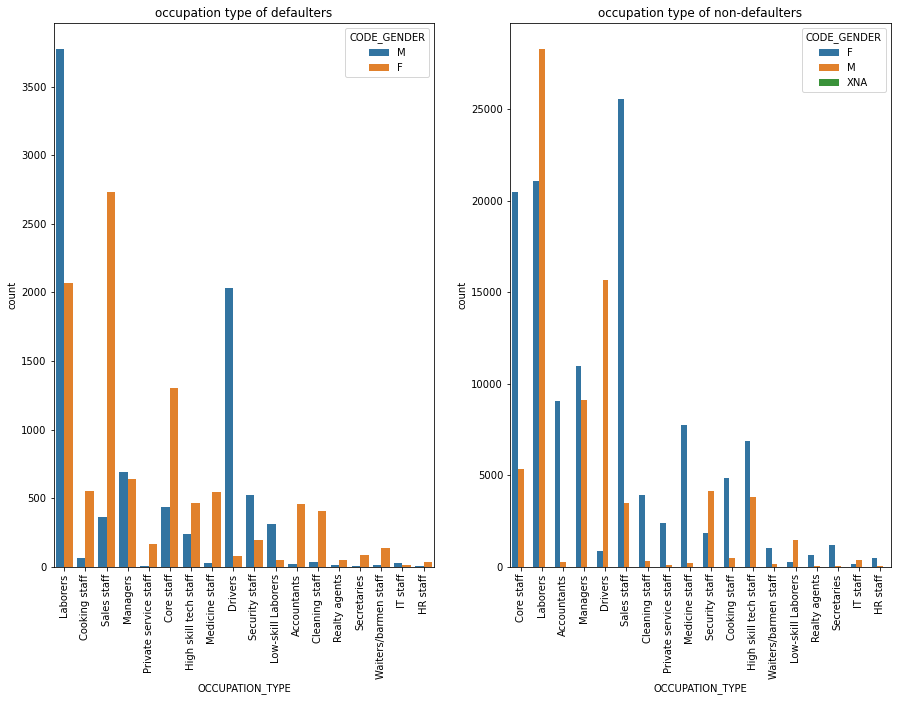

In [495]:
plt.figure(figsize = (15,10))

plt.subplot(1,2,1)
sns.countplot(x = 'OCCUPATION_TYPE', data = application_new_final_target_default,hue="CODE_GENDER")
plt.xticks(rotation = 90)
plt.title('occupation type of defaulters')

plt.subplot(1,2,2)
sns.countplot(x = 'OCCUPATION_TYPE', data = application_new_final_target_non_default,hue="CODE_GENDER")
plt.title('occupation type of non-defaulters')
plt.xticks(rotation = 90)

plt.show()

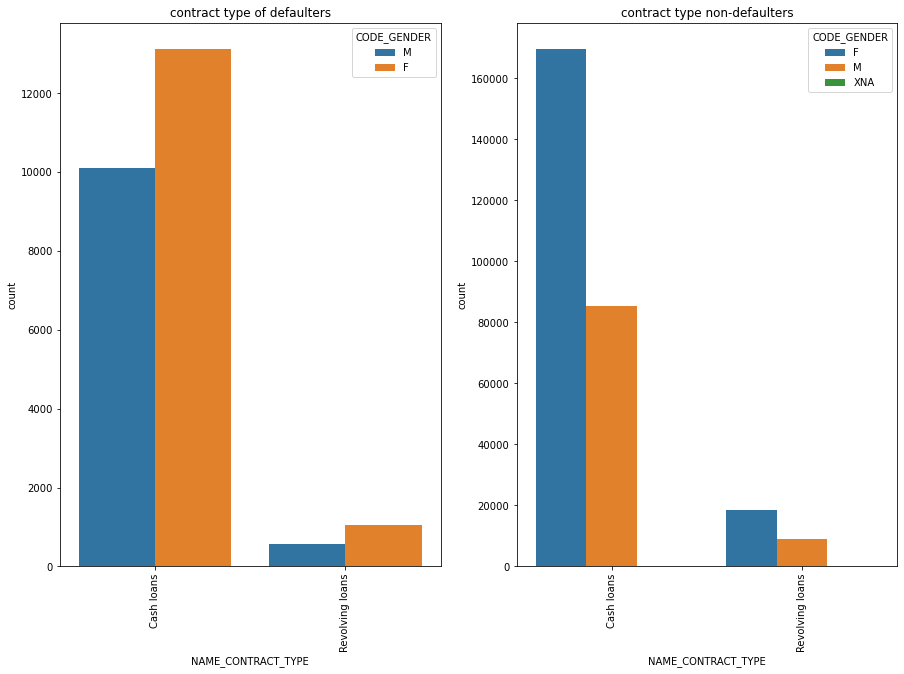

In [496]:
plt.figure(figsize = (15,10))

plt.subplot(1,2,1)
sns.countplot(x = 'NAME_CONTRACT_TYPE', data = application_new_final_target_default,hue="CODE_GENDER")
plt.xticks(rotation = 90)
plt.title('contract type of defaulters')

plt.subplot(1,2,2)
sns.countplot(x = 'NAME_CONTRACT_TYPE', data = application_new_final_target_non_default,hue="CODE_GENDER")
plt.title('contract type non-defaulters')
plt.xticks(rotation = 90)

plt.show()

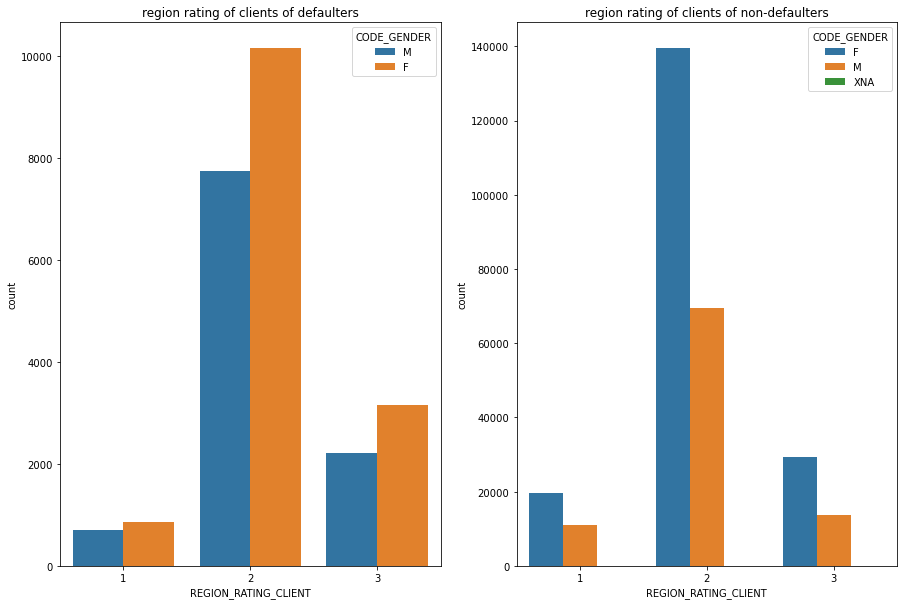

In [497]:
plt.figure(figsize = (15,10))

plt.subplot(1,2,1)
sns.countplot(data=application_new_final_target_default,x="REGION_RATING_CLIENT",hue="CODE_GENDER")
plt.title('region rating of clients of defaulters')

plt.subplot(1,2,2)
sns.countplot(data=application_new_final_target_non_default,x="REGION_RATING_CLIENT",hue="CODE_GENDER")
plt.title('region rating of clients of non-defaulters')

plt.show()

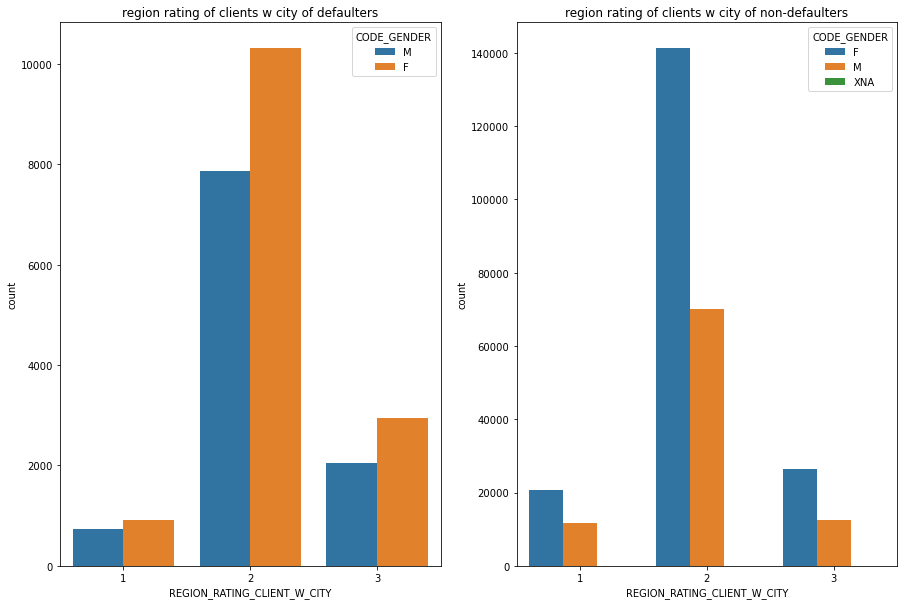

In [498]:
plt.figure(figsize = (15,10))

plt.subplot(1,2,1)
sns.countplot(data=application_new_final_target_default,x="REGION_RATING_CLIENT_W_CITY", hue="CODE_GENDER")
plt.title('region rating of clients w city of defaulters')

plt.subplot(1,2,2)
sns.countplot(data=application_new_final_target_non_default,x="REGION_RATING_CLIENT_W_CITY",hue="CODE_GENDER")
plt.title('region rating of clients w city of non-defaulters')

plt.show()

## Numerical columns

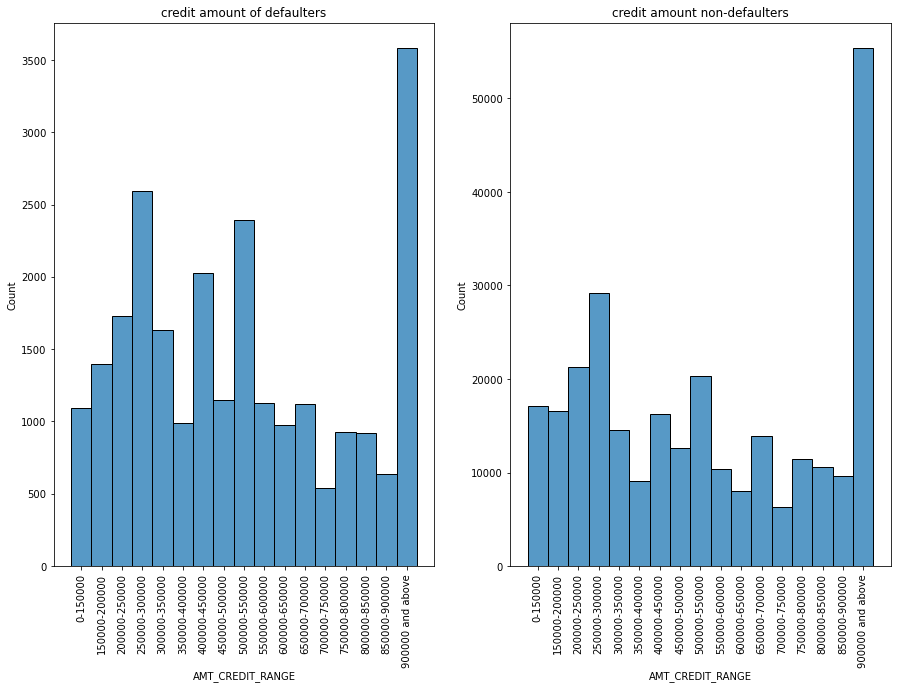

In [499]:
plt.figure(figsize = (15,10))

plt.subplot(1,2,1)
sns.histplot(data=application_new_final_target_default,x="AMT_CREDIT_RANGE")
plt.xticks(rotation = 90)
plt.title('credit amount of defaulters')

plt.subplot(1,2,2)
sns.histplot(data=application_new_final_target_non_default,x="AMT_CREDIT_RANGE")
plt.title('credit amount non-defaulters')
plt.xticks(rotation = 90)

plt.show()

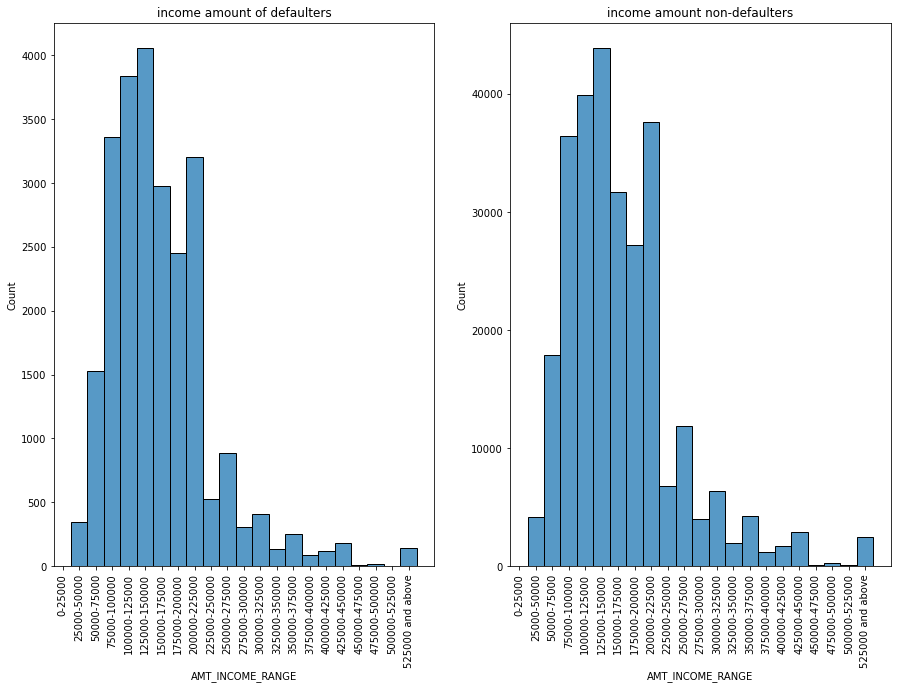

In [500]:
plt.figure(figsize = (15,10))

plt.subplot(1,2,1)
sns.histplot(data=application_new_final_target_default,x="AMT_INCOME_RANGE")
plt.xticks(rotation = 90)
plt.title('income amount of defaulters')

plt.subplot(1,2,2)
sns.histplot(data=application_new_final_target_non_default,x="AMT_INCOME_RANGE")
plt.title('income amount non-defaulters')
plt.xticks(rotation = 90)

plt.show()

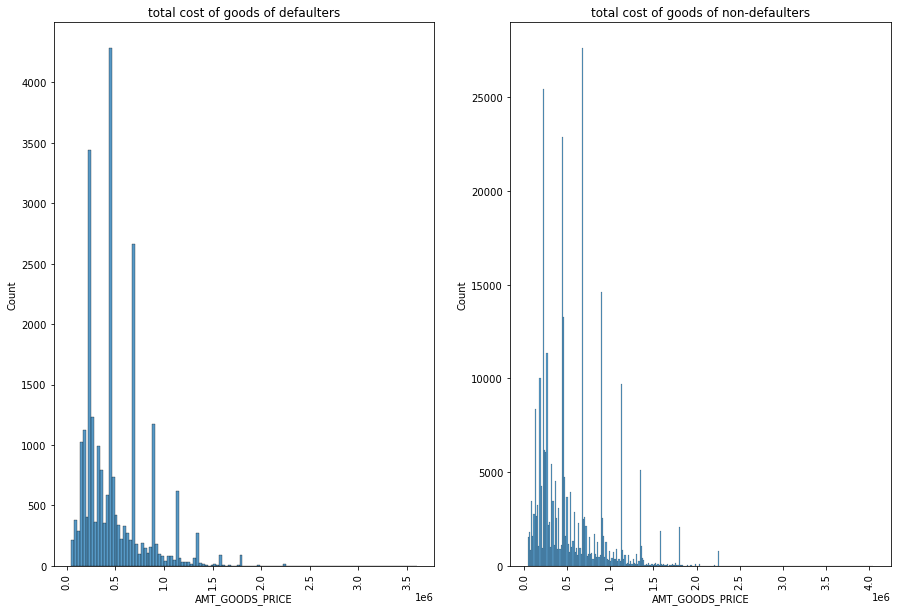

In [501]:
plt.figure(figsize = (15,10))

plt.subplot(1,2,1)
sns.histplot(data=application_new_final_target_default,x="AMT_GOODS_PRICE")
plt.xticks(rotation = 90)
plt.title('total cost of goods of defaulters')

plt.subplot(1,2,2)
sns.histplot(data=application_new_final_target_non_default,x="AMT_GOODS_PRICE")
plt.title('total cost of goods of non-defaulters')
plt.xticks(rotation = 90)

plt.show()

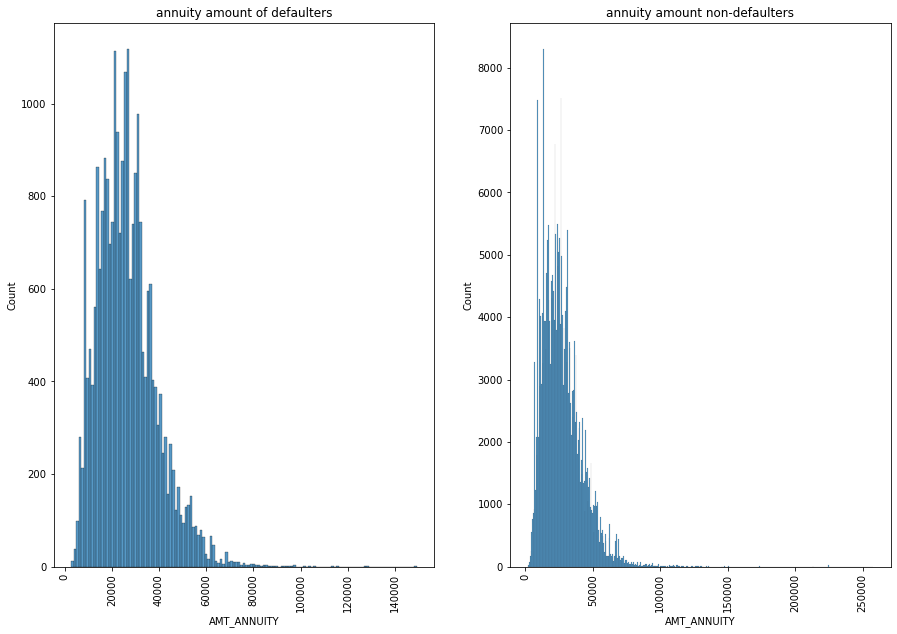

In [502]:
plt.figure(figsize = (15,10))

plt.subplot(1,2,1)
sns.histplot(data=application_new_final_target_default,x="AMT_ANNUITY")
plt.xticks(rotation = 90)
plt.title('annuity amount of defaulters')

plt.subplot(1,2,2)
sns.histplot(data=application_new_final_target_non_default,x="AMT_ANNUITY")
plt.title('annuity amount non-defaulters')
plt.xticks(rotation = 90)

plt.show()

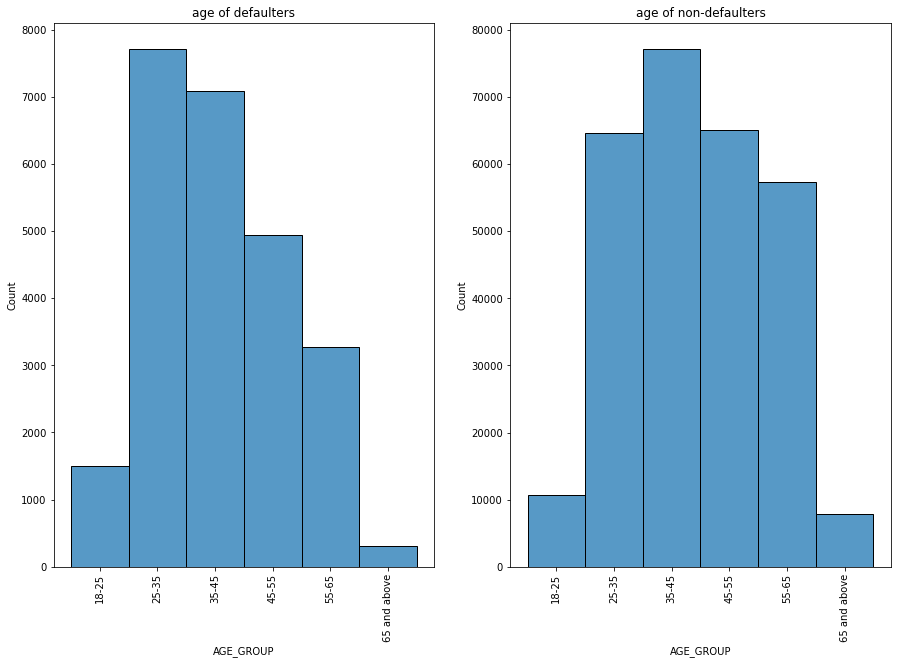

In [503]:
plt.figure(figsize = (15,10))

plt.subplot(1,2,1)
sns.histplot(data=application_new_final_target_default,x="AGE_GROUP")
plt.xticks(rotation = 90)
plt.title('age of defaulters')

plt.subplot(1,2,2)
sns.histplot(data=application_new_final_target_non_default,x="AGE_GROUP")
plt.title('age of non-defaulters')
plt.xticks(rotation = 90)

plt.show()

People older than 35 are more likely to return the loans than those younger 

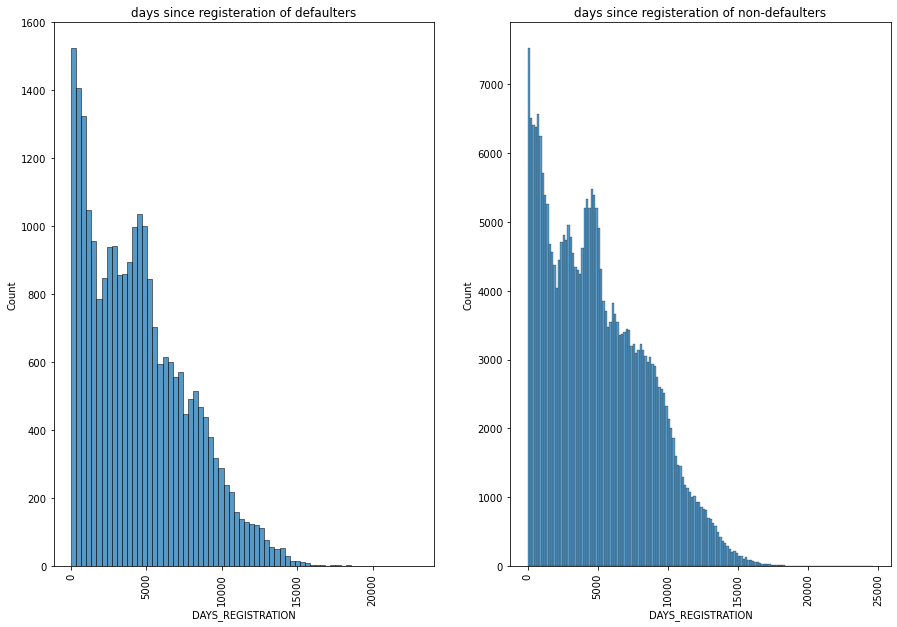

In [504]:
plt.figure(figsize = (15,10))

plt.subplot(1,2,1)
sns.histplot(data=application_new_final_target_default,x="DAYS_REGISTRATION")
plt.xticks(rotation = 90)
plt.title('days since registeration of defaulters')

plt.subplot(1,2,2)
sns.histplot(data=application_new_final_target_non_default,x="DAYS_REGISTRATION")
plt.title('days since registeration of non-defaulters')
plt.xticks(rotation = 90)

plt.show()

## Pair plots

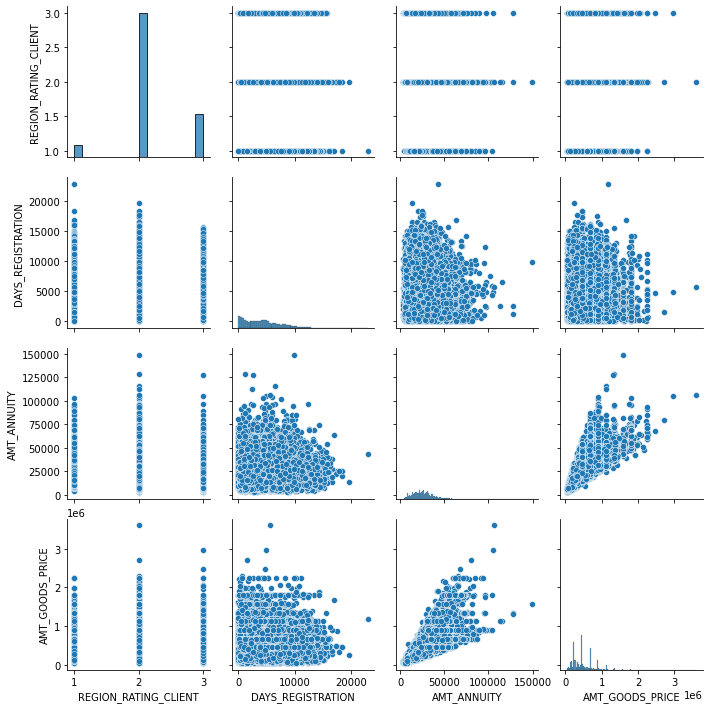

In [505]:
sns.pairplot(data = application_new_final_target_default[['REGION_RATING_CLIENT','DAYS_REGISTRATION','AMT_ANNUITY','AMT_GOODS_PRICE']])
plt.show()

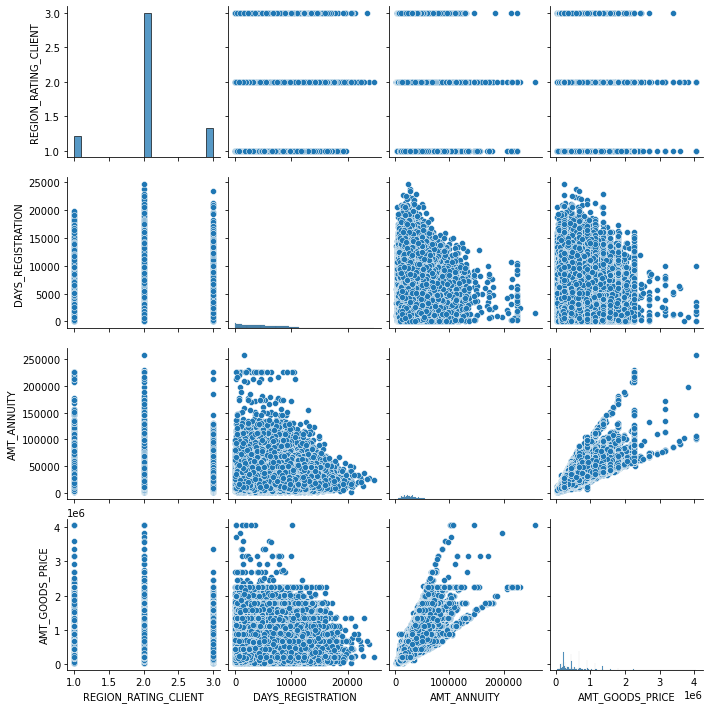

In [506]:
sns.pairplot(data = application_new_final_target_non_default[['REGION_RATING_CLIENT','DAYS_REGISTRATION','AMT_ANNUITY','AMT_GOODS_PRICE']])
plt.show()

From pairplots we can see that days registeration is related to ammount annuity and ammount goods price

## Heatmaps

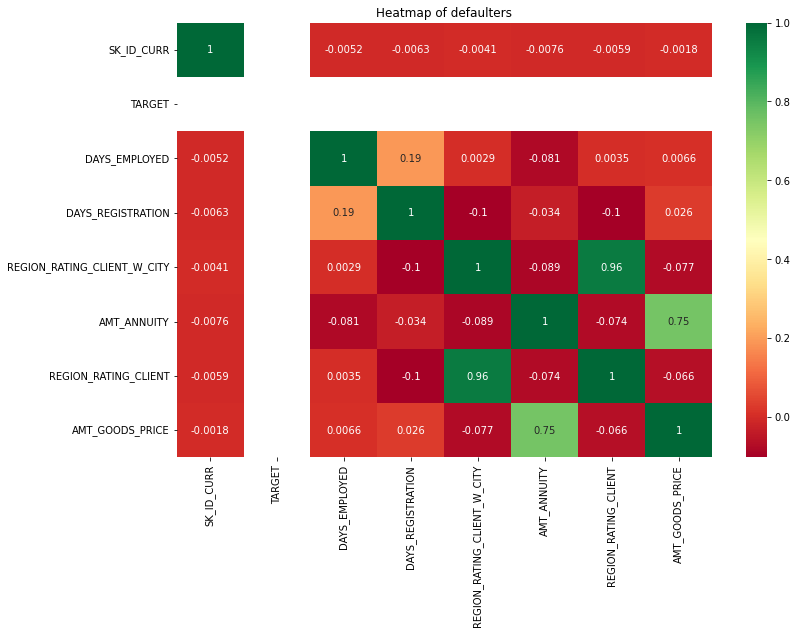

In [507]:
plt.figure(figsize=(12,8)) 
sns.heatmap(application_new_final_target_default.corr(), annot=True, cmap="RdYlGn")
plt.title("Heatmap of defaulters")
plt.show()

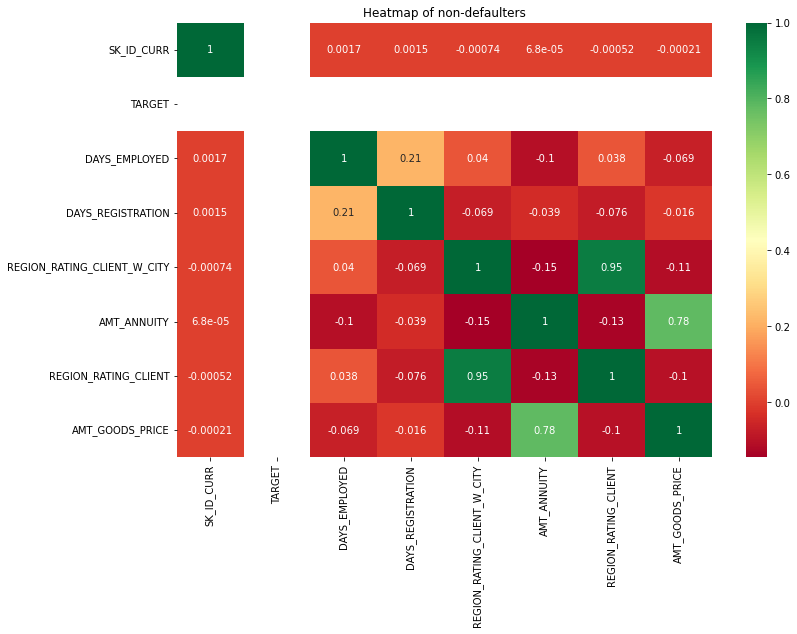

In [508]:
plt.figure(figsize=(12,8)) 
sns.heatmap(application_new_final_target_non_default.corr(), annot=True, cmap="RdYlGn")
plt.title("Heatmap of non-defaulters")
plt.show()

the only relations drawn from the heatmaps is that the AMT_ANNUITY is closely related to AMT_GOODS_PRICE and regional reating of client is closely related to regional rating of client with city

with the analysis of the application data complete, we'll do the same things with the previous application data

# Data Check

In [509]:
application_old.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [510]:
application_old.shape

(1670214, 37)

In [511]:
application_old.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [512]:
application_old.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

# Data Cleaning

In [513]:
application_old_null_percentage = application_old.isnull().sum()/len(application_old)*100

In [514]:
application_old_null_percentage.sort_values()

SK_ID_PREV                      0.000000
NAME_YIELD_GROUP                0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
NAME_PORTFOLIO                  0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE                0.000000
CODE_REJECT_REASON              0.000000
DAYS_DECISION                   0.000000
NAME_CONTRACT_STATUS            0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_PAYMENT_TYPE               0.000000
AMT_APPLICATION                 0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
HOUR_APPR_PROCESS_START         0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
NAME_CONTRACT_TYPE              0.000000
SK_ID_CURR                      0.000000
AMT_CREDIT                      0.000060
PRODUCT_COMBINATION             0.020716
CNT_PAYMENT                    22.286366
AMT_ANNUITY     

In [515]:
application_old_null_percentage[application_old_null_percentage>=40]

AMT_DOWN_PAYMENT             53.636480
RATE_DOWN_PAYMENT            53.636480
RATE_INTEREST_PRIMARY        99.643698
RATE_INTEREST_PRIVILEGED     99.643698
NAME_TYPE_SUITE              49.119754
DAYS_FIRST_DRAWING           40.298129
DAYS_FIRST_DUE               40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_LAST_DUE                40.298129
DAYS_TERMINATION             40.298129
NFLAG_INSURED_ON_APPROVAL    40.298129
dtype: float64

In [516]:
application_old_null_percentage[application_old_null_percentage>=40].index

Index(['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_TYPE_SUITE', 'DAYS_FIRST_DRAWING',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [517]:
application_old.drop(columns=['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_TYPE_SUITE', 'DAYS_FIRST_DRAWING',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'], inplace=True)

In [518]:
application_old.shape

(1670214, 26)

In [519]:
application_old.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE                    object
SELLERPLACE_AREA                 int64
NAME_SELLER_INDUSTRY            object
CNT_PAYMENT                    float64
NAME_YIELD_GROUP                object
PRODUCT_COMBINATION      

In [520]:
application_old.DAYS_DECISION.value_counts()

-245     2444
-238     2390
-210     2375
-273     2350
-196     2315
-224     2305
-252     2300
-182     2283
-240     2279
-231     2270
-183     2268
-239     2241
-259     2232
-217     2205
-266     2201
-209     2193
-203     2182
-280     2175
-189     2171
-287     2170
-294     2170
-211     2152
-181     2148
-175     2138
-268     2132
-270     2129
-230     2125
-329     2118
-272     2114
-244     2110
-300     2109
-249     2104
-308     2101
-276     2094
-208     2092
-364     2088
-243     2084
-260     2081
-216     2079
-265     2069
-279     2066
-269     2063
-184     2056
-246     2052
-251     2049
-188     2047
-241     2046
-195     2044
-236     2028
-219     2028
-301     2027
-232     2018
-213     2017
-336     2016
-267     2016
-275     2010
-315     2010
-237     2005
-168     2003
-205     1998
-229     1993
-328     1993
-235     1991
-271     1990
-202     1980
-197     1977
-233     1976
-288     1967
-293     1962
-330     1959
-256     1956
-242  

In [521]:
application_old.DAYS_DECISION =application_old.DAYS_DECISION.apply(lambda x: abs(x))
application_old.DAYS_DECISION.value_counts()

245     2444
238     2390
210     2375
273     2350
196     2315
224     2305
252     2300
182     2283
240     2279
231     2270
183     2268
239     2241
259     2232
217     2205
266     2201
209     2193
203     2182
280     2175
189     2171
287     2170
294     2170
211     2152
181     2148
175     2138
268     2132
270     2129
230     2125
329     2118
272     2114
244     2110
300     2109
249     2104
308     2101
276     2094
208     2092
364     2088
243     2084
260     2081
216     2079
265     2069
279     2066
269     2063
184     2056
246     2052
251     2049
188     2047
241     2046
195     2044
236     2028
219     2028
301     2027
232     2018
213     2017
336     2016
267     2016
275     2010
315     2010
237     2005
168     2003
205     1998
229     1993
328     1993
235     1991
271     1990
202     1980
197     1977
233     1976
288     1967
293     1962
330     1959
256     1956
242     1953
264     1952
257     1950
176     1949
350     1949
212     1949

In [522]:
application_old.NAME_SELLER_INDUSTRY.value_counts(normalize=True)

XNA                     0.512342
Consumer electronics    0.238451
Connectivity            0.165266
Furniture               0.034636
Construction            0.017831
Clothing                0.014339
Industry                0.011492
Auto technology         0.002988
Jewelry                 0.001622
MLM partners            0.000727
Tourism                 0.000307
Name: NAME_SELLER_INDUSTRY, dtype: float64

since the NAME_SELLER_INDUSTRY has XNA in at 51.2%, we'll drop it.

In [523]:
application_old.drop(columns='NAME_SELLER_INDUSTRY', inplace = True)

In [524]:
application_old.NAME_CASH_LOAN_PURPOSE.value_counts(normalize=True)

XAP                                 0.552421
XNA                                 0.405887
Repairs                             0.014229
Other                               0.009345
Urgent needs                        0.005036
Buying a used car                   0.001729
Building a house or an annex        0.001612
Everyday expenses                   0.001447
Medicine                            0.001302
Payments on other loans             0.001156
Education                           0.000942
Journey                             0.000742
Purchase of electronic equipment    0.000635
Buying a new car                    0.000606
Wedding / gift / holiday            0.000576
Buying a home                       0.000518
Car repairs                         0.000477
Furniture                           0.000448
Buying a holiday home / land        0.000319
Business development                0.000255
Gasification / water supply         0.000180
Buying a garage                     0.000081
Hobby     

again XAP and XNA make 95% of the NAME_CASH_LOAN_PURPOSE so, we'll drop the column

In [525]:
application_old.drop(columns='NAME_CASH_LOAN_PURPOSE', inplace = True)

In [526]:
application_old.NAME_PRODUCT_TYPE.value_counts(normalize=True)

XNA        0.636844
x-sell     0.273191
walk-in    0.089965
Name: NAME_PRODUCT_TYPE, dtype: float64

since XNA is 63.6%, we'll drop the NAME_PRODUCT_TYPE column

In [527]:
application_old.drop(columns='NAME_PRODUCT_TYPE', inplace=True)

In [528]:
application_old.CODE_REJECT_REASON.value_counts(normalize=True)

XAP       0.810132
HC        0.104915
LIMIT     0.033337
SCO       0.022432
CLIENT    0.015828
SCOFR     0.007670
XNA       0.003140
VERIF     0.002116
SYSTEM    0.000429
Name: CODE_REJECT_REASON, dtype: float64

with the column CODE_REJECT_REASON containing 81% XAP, we'll drop it

In [529]:
application_old.drop(columns='CODE_REJECT_REASON',inplace=True)

After dropping the columns that we had too much empty data in application_old, we'll now drop the columns that won't be useful in analyzing the data

In [530]:
application_old.drop(columns=['SK_ID_PREV','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','DAYS_DECISION','SELLERPLACE_AREA'], inplace = True)

to check if all the columns have been dropped, we'll see the shape of the dataframe

In [531]:
application_old.shape

(1670214, 17)

now, we'll merge the two dataframe, application_new_final and application_old with an innter join on the column SK_ID_CURR and use the suffix_x to mark the difference between the overlapping columns

In [532]:
df_merged = pd.merge(left = application_new_final, right = application_old,how = 'inner', on = 'SK_ID_CURR', suffixes='_x')

# Data Check

we'll do a data check of the new column to ensure the merging was done properly

In [533]:
df_merged.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1413701 non-null  int64   
 1   TARGET                       1413701 non-null  int64   
 2   CODE_GENDER                  1413701 non-null  object  
 3   FLAG_OWN_CAR                 1413701 non-null  object  
 4   FLAG_OWN_REALTY              1413701 non-null  object  
 5   NAME_INCOME_TYPE             1413701 non-null  object  
 6   NAME_EDUCATION_TYPE          1413701 non-null  object  
 7   NAME_FAMILY_STATUS           1413701 non-null  object  
 8   NAME_HOUSING_TYPE            1413701 non-null  object  
 9   DAYS_EMPLOYED                1413701 non-null  int64   
 10  DAYS_REGISTRATION            1413701 non-null  float64 
 11  OCCUPATION_TYPE              956121 non-null   object  
 12  REGION_RATING_CLIENT_W_CITY 

In [534]:
df_merged.shape

(1413701, 37)

In [535]:
df_merged.head()

SK_ID_CURR  TARGET CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100002       1           M            N               Y   
1      100003       0           F            N               N   
2      100003       0           F            N               N   
3      100003       0           F            N               N   
4      100004       0           M            Y               Y   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2    State servant               Higher education               Married   
3    State servant               Higher education               Married   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE  DAYS_EMPLOYED  ...  NFLAG_LAST_APPL_IN_DAY  \
0  House / apartment            637  ...                       1   
1  House / apartment           1188  ...                       1   
2  House / apartment           1188  ...                       1   
3  House / apartment           1188  ...                       1   
4  House / apartment            225  ...                       1   

  NAME_CONTRACT_STATUS      NAME_PAYMENT_TYPE NAME_CLIENT_TYPE  \
0             Approved                    XNA              New   
1             Approved                    XNA         Repeater   
2             Approved  Cash through the bank        Refreshed   
3             Approved  Cash through the bank        Refreshed   
4             Approved  Cash through the bank              New   

    NAME_GOODS_CATEGORY  NAME_PORTFOLIO             CHANNEL_TYPE  CNT_PAYMENT  \
0              Vehicles             POS                    Stone         24.0   
1                   XNA            Cash  Credit and cash offices         12.0   
2             Furniture             POS                    Stone          6.0   
3  Consumer Electronics             POS             Country-wide         12.0   
4                Mobile             POS         Regional / Local          4.0   

  NAME_YIELD_GROUP          PRODUCT_COMBINATION  
0       low_normal      POS other with interest  
1       low_normal             Cash X-Sell: low  
2           middle   POS industry with interest  
3           middle  POS household with interest  
4           middle  POS mobile without interest  

[5 rows x 37 columns]

In [536]:
df_merged.isnull().sum()

SK_ID_CURR                          0
TARGET                              0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
OCCUPATION_TYPE                457580
REGION_RATING_CLIENT_W_CITY         0
ORGANIZATION_TYPE                   0
NAME_CONTRACT_TYPE_                 0
AMT_ANNUITY_                       93
REGION_RATING_CLIENT                0
AMT_GOODS_PRICE_                 1208
AGE_GROUP                           0
AMT_INCOME_RANGE                   13
AMT_CREDIT_RANGE                    0
NAME_CONTRACT_TYPEx                 0
AMT_ANNUITYx                   307218
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_GOODS_PRICEx               319525
FLAG_LAST_AP

In [537]:
df_merged.isnull().sum()/len(df_merged)*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
OCCUPATION_TYPE                32.367523
REGION_RATING_CLIENT_W_CITY     0.000000
ORGANIZATION_TYPE               0.000000
NAME_CONTRACT_TYPE_             0.000000
AMT_ANNUITY_                    0.006578
REGION_RATING_CLIENT            0.000000
AMT_GOODS_PRICE_                0.085449
AGE_GROUP                       0.000000
AMT_INCOME_RANGE                0.000920
AMT_CREDIT_RANGE                0.000000
NAME_CONTRACT_TYPEx             0.000000
AMT_ANNUITYx                   21.731469
AMT_APPLICATION                 0.000000
AMT_CREDIT      

# Analysis

## Categorical columns

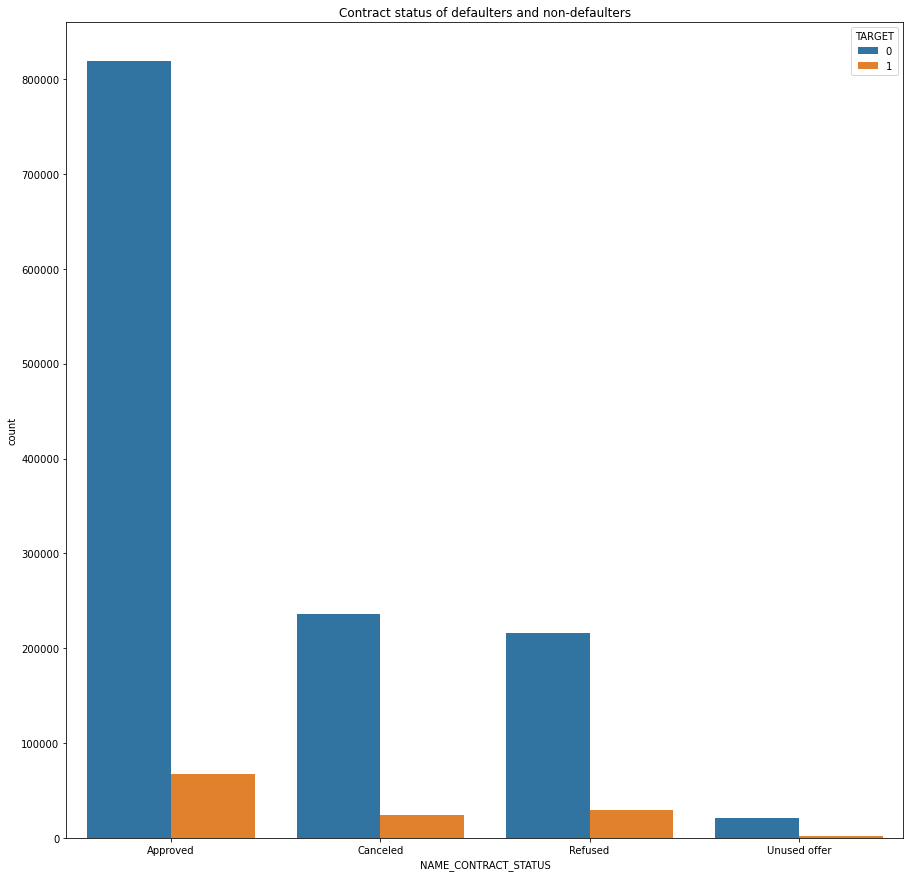

In [538]:
plt.figure(figsize = (15,15))

sns.countplot(x = 'NAME_CONTRACT_STATUS', data = df_merged,hue="TARGET")
plt.title('Contract status of defaulters and non-defaulters')

plt.show()

People who's previous offers were unused are least likely to default while those who's previous loans were approved are more likely to default. But they cannot be discarded because they are also the ones with the highest return percentage

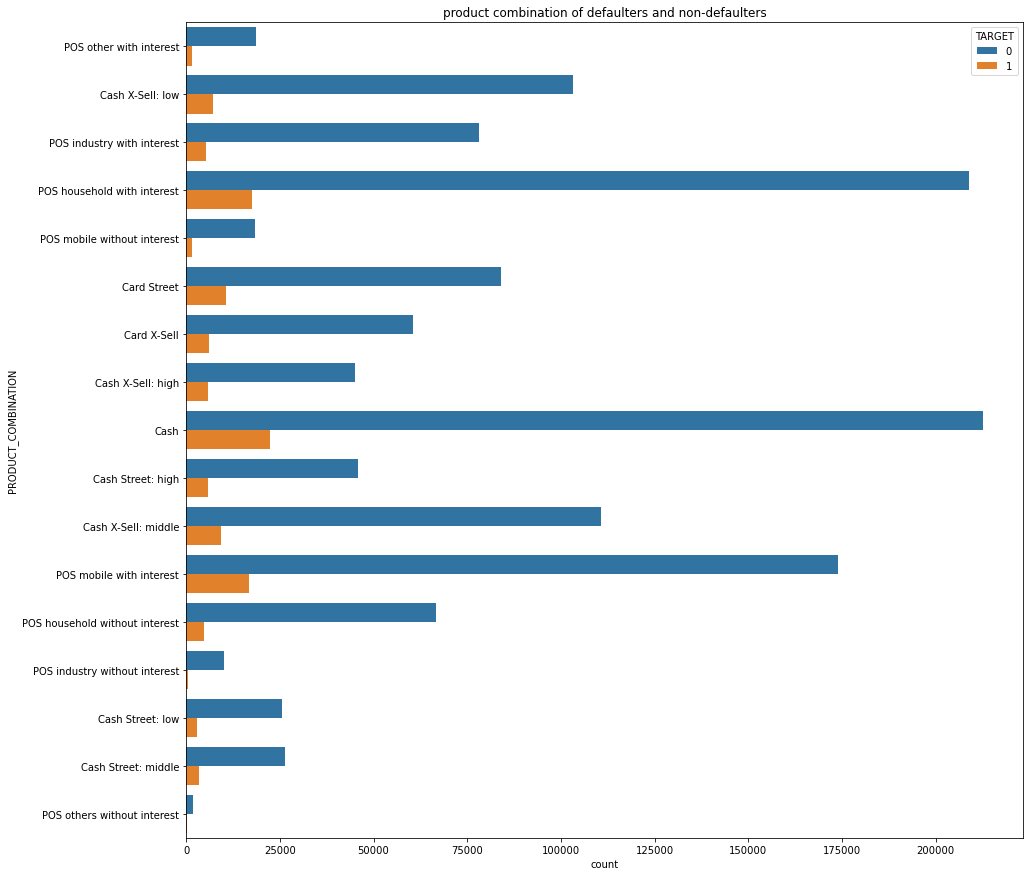

In [539]:
plt.figure(figsize = (15,15))

sns.countplot(y = 'PRODUCT_COMBINATION', data = df_merged,hue="TARGET")
plt.title('product combination of defaulters and non-defaulters')

plt.show()

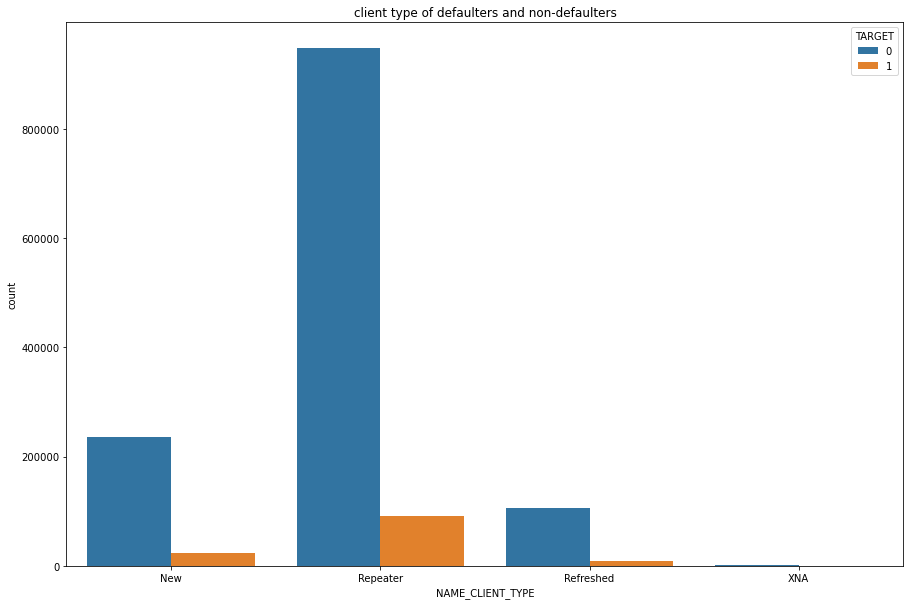

In [540]:
plt.figure(figsize = (15,10))

sns.countplot(x = 'NAME_CLIENT_TYPE', data = df_merged,hue="TARGET")
plt.title('client type of defaulters and non-defaulters')

plt.show()

The new clients are least likely to default while repeater are more likely to default. But since repeaters are the highest percentage of non-defaulters also, we cannot discard them

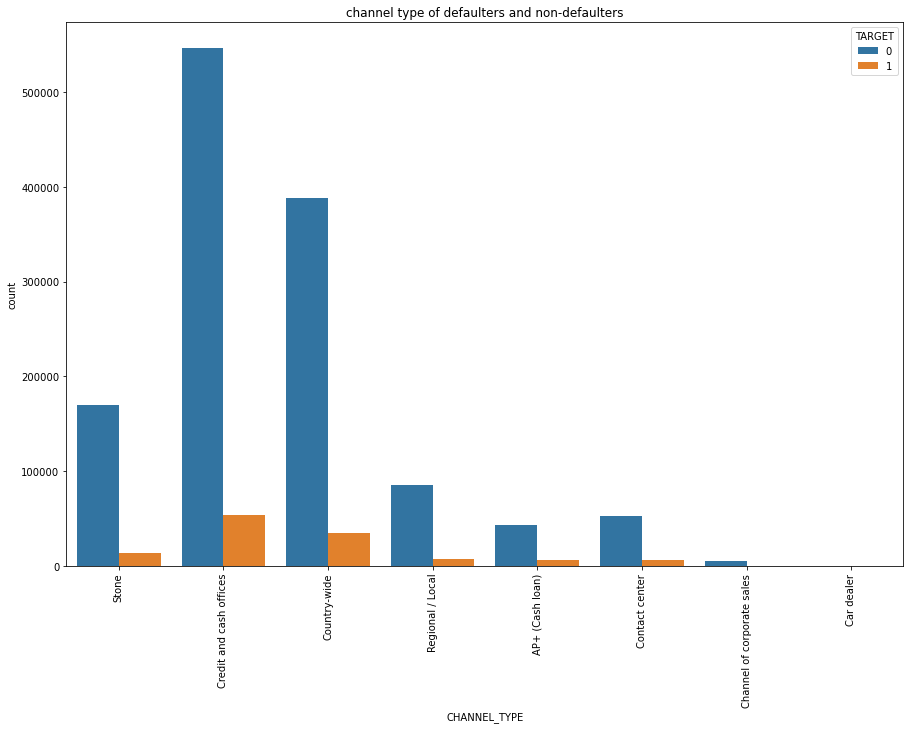

In [541]:
plt.figure(figsize = (15,10))

sns.countplot(x = 'CHANNEL_TYPE', data = df_merged,hue="TARGET")
plt.title('channel type of defaulters and non-defaulters')
plt.xticks(rotation = 90)

plt.show()

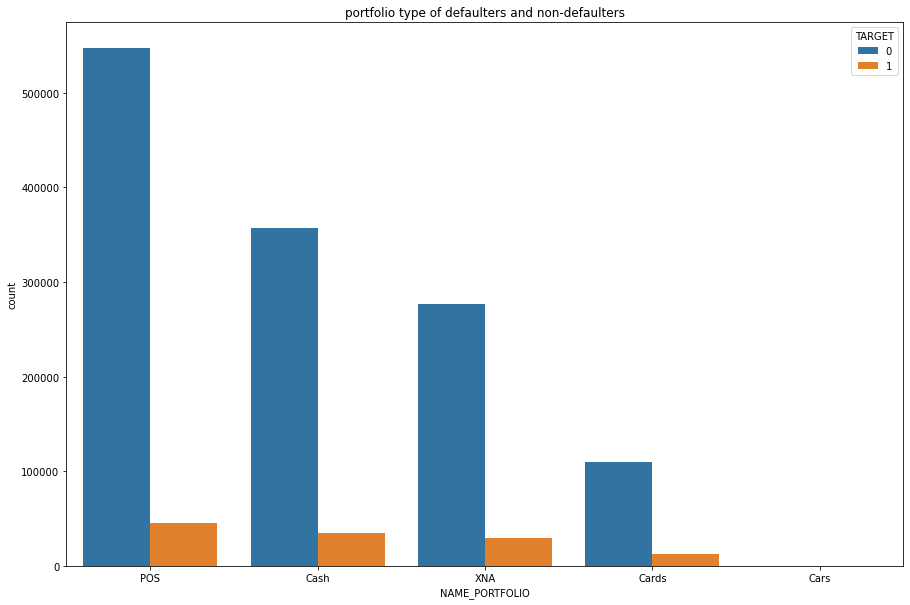

In [542]:
plt.figure(figsize = (15,10))

sns.countplot(x = 'NAME_PORTFOLIO', data = df_merged,hue="TARGET")
plt.title('portfolio type of defaulters and non-defaulters')

plt.show()

## Pairplot

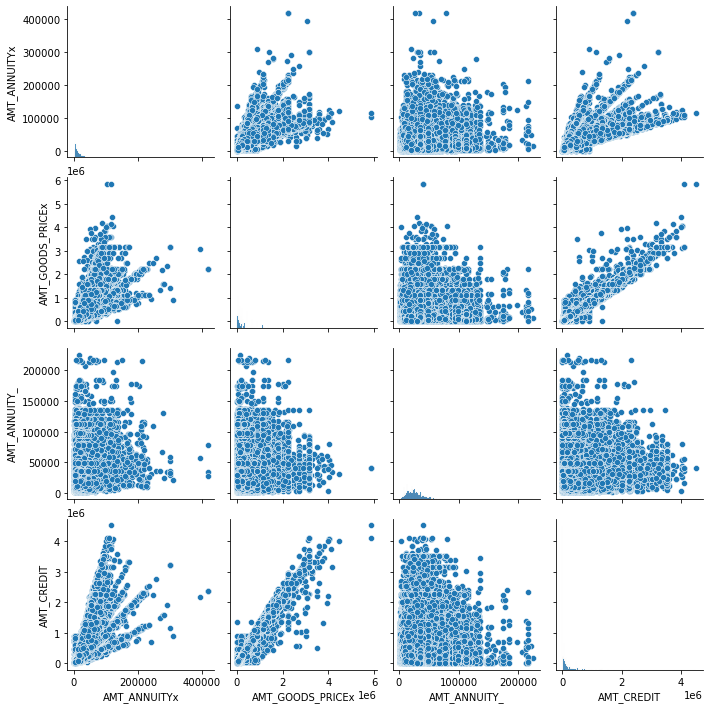

In [543]:
sns.pairplot(df_merged[['AMT_ANNUITYx','AMT_GOODS_PRICEx','AMT_ANNUITY_','AMT_CREDIT']])
plt.show()

## Heatmap

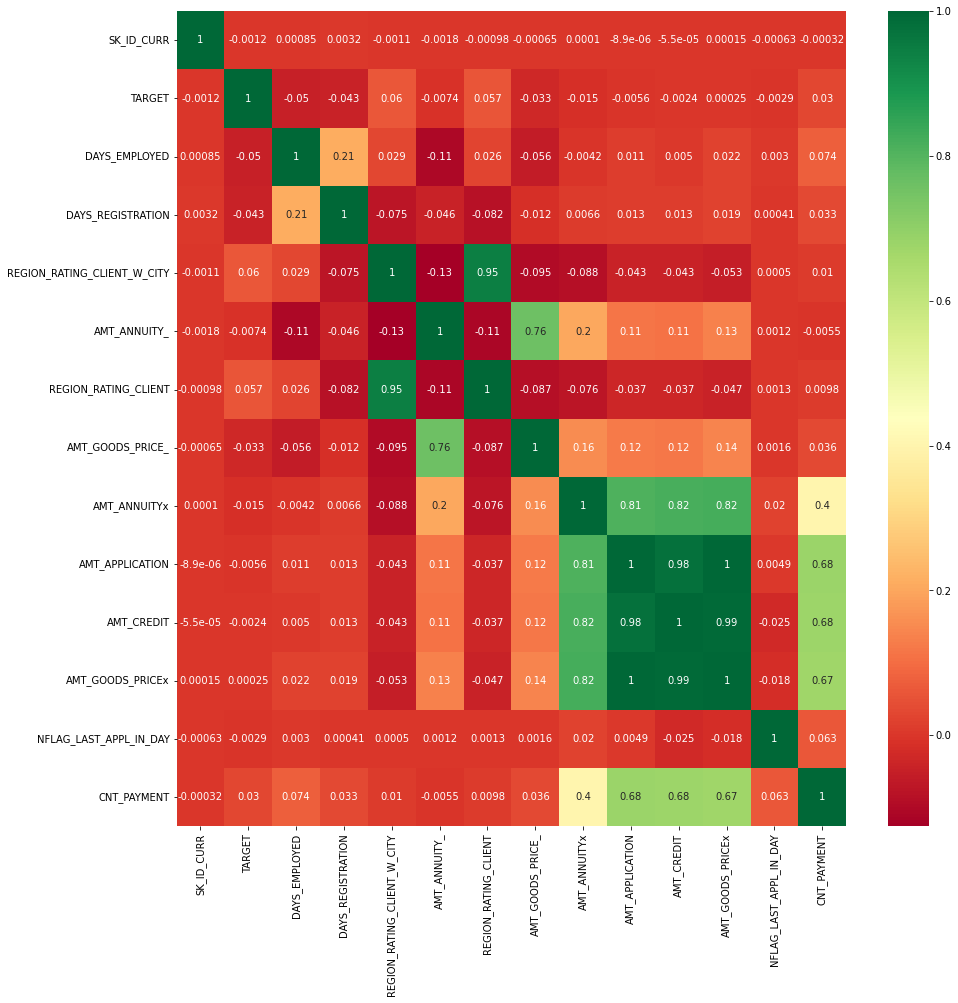

In [544]:
plt.figure(figsize=(15,15))
sns.heatmap(df_merged.corr(), annot=True, cmap='RdYlGn')
plt.show()

# Conclusion

1.The Bank should lend more to females than males as they are less likely to default the payments

2.The bank should focus more on Businessmen and students as they never default and also on pensioners and commercial associates as they have less number of defaults.

3.The bank should give priority to people with higher education 

4.The bank should avoid giving loans to single/unmarried people

5.The bank should avoid giving loans to those who live with parents or in a rented apartment

6.Banks should give priority to Sales staff, service staff, managers and core staff.

7.The bank should give priority to those who take revolving loans instead of cash loans

8.people with the region rating of 1 are higher in non-defaulters and people with region rating of 3 are higher in defaulters

9.The banks should prefer people of age 35 and above to give loans as they are more likely to pay them back

10.Bank should prefer those people who’s previous offers were unused as they have a higher chance of paying them back

11.The bank should prefer new and refreshed clients since they have the least numbers of defaults in their payments